# BTW 2025
# Data Science Challenge: Predicting Energy Prices
**This notebook was submitted by Group 2:** <br>
- Meike Bauer 
- Prajwal Amoghavarsh 
<br>

**This notebook is structured as follows. The group member responsible for the respective parts is written in brackets:**
- Phase 1: Gathering Domain Knowledge & Data Sources *(Meike Bauer)*
- Phase 2 & 3: Data Cleaning, Exploratory Data Analysis, Visualization & Storytelling *(Meike Bauer)*
- Phase 4: Predictive Modelling *(Prajwal Amoghavarsh)*
- Limitations and Suggestions for Future Work *(Meike Bauer, Prajwal Amoghavarsh)*
- Appendix: Code for Downloading and Preprocessing the Data Sources *(Meike Bauer)*
<br>


Please refer to the respective contributor for questions or remarks about specific parts.
<br>
The result of our predictive modelling can be seen in the end of Phase 4 (Predictive Modelling). Based on the RMSE (Root Mean Squared Error) we evaluated our predicted day-ahead values with the day-ahead values provided by SMARD for the 5th of February 2025.

---
# Phase 1: Gathering Domain Knowledge & Data Sources

> In the following section, we provide basic domain knowledge about the German energy market, including its structure, price formation, and different energy sources. Thereby, we decide on the data sources, that we want to analyze further and potentially include in our predictive analysis: Historical Energy Prices, Weather Data, Data on the Energy Generation and Consumption, and Data on the Prices and Imports of Non-Renewable Energy Sources.

### **Market Structure**

- **Generation**: Energy is generated through various sources: fossil fuels, renewables, and nuclear energy. Historically, coal and natural gas have been dominant, but in recent years, Germany has focused on transitioning to renewable energy (Energiewende).

- **Transmission**: Electricity generated in power plants is transmitted through a network of high-voltage lines. This is done by **Transmission System Operators (TSOs)**.

- **Distribution**: After transmission, electricity is distributed through lower-voltage networks to end users. This is handled by **Distribution System Operators (DSOs)**.

- **Market Types**: The electricity market can be divided into wholesale (spot and futures markets) and retail markets. The spot market determines the price of electricity on a given day.

### **How Prices Are Set**

- **Wholesale Market (Spot Market)**: Prices in the wholesale electricity market are set based on **supply and demand**. The spot market is influenced by the marginal cost of the last unit of electricity needed to meet demand, typically from the most expensive source (e.g., gas). This is known as the **merit-order principle**.

- **Energy Taxes and Levies**: In addition to market-driven prices, consumers pay taxes and levies. These include the **EEG surcharge** (funding renewable energy), **congestion fees**, and **carbon pricing** (part of EU Emission Trading System, ETS). These components can significantly affect electricity prices for end consumers.

- **Retail Market**: Prices for end users are determined by energy suppliers who purchase electricity on the wholesale market and add additional costs, including distribution, taxes, and profit margins. Retail prices tend to fluctuate based on wholesale price changes, but also reflect contracts between utilities and consumers.

### **Energy Sources in Germany**

Germany's energy mix has undergone significant changes in the past decades. The country has been a leader in transitioning to renewable energy (the Energiewende):

- **Renewables**:
  - **Wind**: Both onshore and offshore wind power have become major contributors.
  - **Solar**: Solar photovoltaic systems have seen rapid growth, especially in rural and residential areas.
  - **Biomass**: Biomass accounts for a significant share of renewable energy production.
  - **Hydropower**: A smaller, but still relevant, share of renewable energy comes from hydropower.

- **Fossil Fuels**:
  - **Coal**: While coal was historically a major source of electricity, its share has been declining due to climate targets.
  - **Natural Gas**: This is still a key player, often used to meet demand peaks. Natural gas has also been used as a bridge fuel during the renewable energy transition.

- **Nuclear**: Germany has been phasing out nuclear energy and shut down the last reactors by 2023. This was part of the country's response to the Fukushima disaster in 2011.

- **Imports**: Germany imports some of its electricity from neighboring countries, depending on price and demand.

### **Conclusion**
The electricity wholesale price depends on several factors and is influenced by the complex structure of the energy market. To predict energy prices in Germany, it’s essential to consider several key factors. These include historical price data, weather conditions (which impact renewable generation like wind and solar), energy consumption patterns, and fossil fuel prices (especially natural gas and coal). Weather and consumption patterns affect supply and demand, while fossil fuel prices influence production costs. By incorporating these elements, we hope to develop an accurate prediction of the day-ahead energy prices.

### Sources:
1. **Bundesnetzagentur (Federal Network Agency)**: (https://www.bundesnetzagentur.de)
2. **German Federal Ministry for Economic Affairs and Climate Action (BMWK)**: (https://www.bmwk.de/Navigation/DE/Home/home.html)
3. **International Energy Agency (IEA):** (https://www.iea.org/countries/germany)
4. **Agora Energiewende**: (https://www.agora-energiewende.de)


---
# Phase 2 & 3: Data Cleaning, Exploratory Data Analysis, Visualization & Storytelling


> In this section we take a look at the four variables that we previously identified as being relevant for our prediction: Historical energy prices, energy consumption and generation data, weather data, and cost of non-renewable sources. For each variable, we first describe how we accessed the data and the steps that were needed for preprocessing. Second, we visualize the data to get a better understanding of its structure, patterns, and outliers. After that, we investigate the correlation between the variables and the day-ahead energy prices (which we want to predict). In the end, we conclude with a final dataset, that includes the data for all variables we were able to get access to (historical energy prices, energy consumption and generation data, weather data). <br>
The following analysis includes data from 1st of January 2020 to 31st of December 2024. We believe that this timespan offers valuable insights into the datasets by including historical and recent data.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

---
## Preprocessing, Analysis and Visualization of Data Sources
The full code for accessing the data and most of the preprocessing (basic steps mostly for formatting the data) is appended in the end of this notebook in order to maintain the clear structure. However, the appended code is not needed to execute the code in the following section as we provide all datasets, that we work with (see directory "datasets" in our git repository). <br>

### Historical Energy Prices: Hourly Day-Ahead Prices from SMARD
SMARD.de provides day-ahead energy prices in an hourly resolution. We downloaded the data from the website and only kept the data for the bidding zone "DE/LU".

In [ ]:
# load price dataset
df_prices = pd.read_csv('Electricity_Forecasted_Prices.csv')

#### Preprocessing
For preprocessing we checked for null values and made sure that the measurement date is in datetime format. <br>
Also, we had to deal with issues due to the German time change. The energy prices dataset has 5 duplicated values, that arise from the german time change in autumn: The dataset has values only for the actually existing timestamps (meaning none for the spring time change and two for the autumn time change). We decided to use the value that was measured later for the autumn time change as it can be considered to be the more present one.

In [ ]:
# adapt the format of the prices dataframe
df_prices = df_prices.drop('Unnamed: 0', axis=1)
df_prices = df_prices.drop('Datum bis', axis=1)
df_prices['Datum von'] = pd.to_datetime(df_prices['Datum von'])
df_prices = df_prices.rename(columns = {'Datum von': 'MESS_DATUM'})
df_prices = df_prices.rename(columns = {'Deutschland/Luxemburg [€/MWh] Originalauflösungen': 'Price'})
df_prices['Price'] = df_prices['Price'].str.replace(',', '.').astype(float)

# deal with time change issues
duplicates = df_prices[df_prices['MESS_DATUM'].duplicated(keep=False)] # Find duplicate rows in df_prices based on the 'MESS_DATUM' column
df_prices_no_duplicates = df_prices.drop_duplicates(subset='MESS_DATUM', keep='last') # create new dataframe without duplicates
df_prices = df_prices_no_duplicates.copy()
df_prices.describe()

,MESS_DATUM,Price
count,43843,43843.000000
mean,2022-07-02 11:45:45.879615744,107.239543
min,2020-01-01 00:00:00,-500.000000
25%,2021-04-01 18:30:00,41.365000
50%,2022-07-02 12:00:00,81.760000
75%,2023-10-02 05:30:00,129.620000
max,2024-12-31 23:00:00,936.280000
std,NaN,104.452182


In [ ]:
# clean up
del(df_prices_no_duplicates)

#### Visualize the Data

In [ ]:
# create copy of dataframe to work with
df_prices_copy = df_prices.copy()

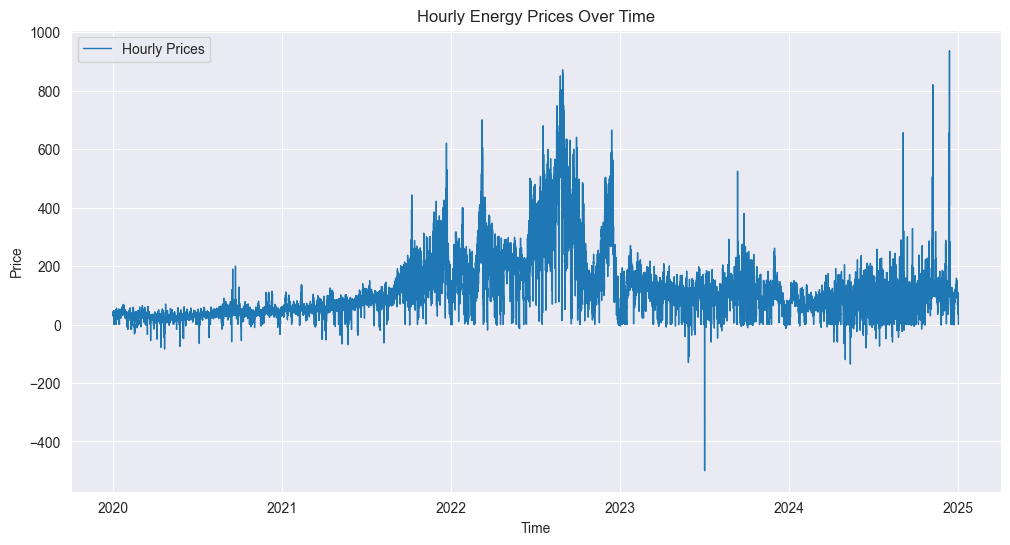

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_prices_copy['MESS_DATUM'], df_prices_copy['Price'], label="Hourly Prices", linewidth=1)
plt.title("Hourly Energy Prices Over Time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

The chart shows hourly energy prices from 2020 to 2025, highlighting stability until mid-2021, followed by sharp increases and volatility, peaking above 800 in 2022. Negative prices occur occasionally, likely due to oversupply. Post-2023, prices stabilize but remain volatile, reflecting ongoing market uncertainty. Extreme peak values indicate outliers, possibly due to errors in the dataset.

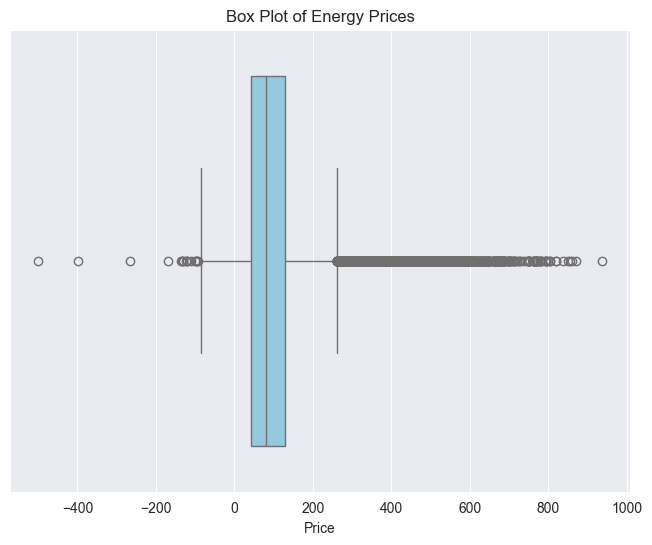

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_prices_copy['Price'], color='skyblue')
plt.title("Box Plot of Energy Prices")
plt.xlabel("Price")
plt.show()

The box plot shows the distribution of energy prices. Most prices are concentrated around 0–200, with a narrow interquartile range. There are outliers on both ends, with negative prices below -400 and positive prices above 800, indicating occasional market anomalies or errors in the dataset. The data is right-skewed due to high-price spikes.

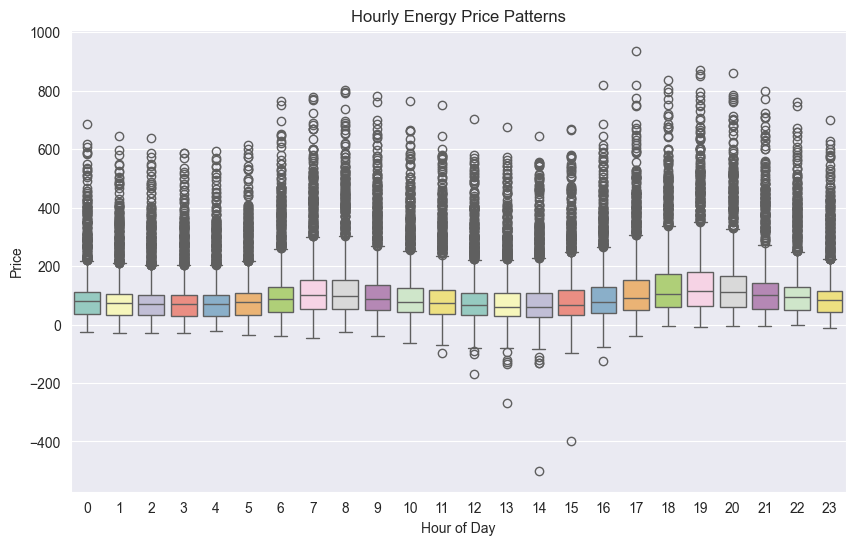

In [ ]:
df_prices_copy['hour'] = df_prices_copy['MESS_DATUM'].dt.hour

plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='Price', data=df_prices, hue='hour', palette="Set3", legend=False)
plt.title("Hourly Energy Price Patterns")
plt.xlabel("Hour of Day")
plt.ylabel("Price")
plt.show()

The box plot shows hourly energy price patterns. Prices are lower and more stable during early morning hours (0–5), with higher variability and occasional spikes during the day, likely due to increased demand. Outliers above 600 and below -200 are most frequent during peak demand times.

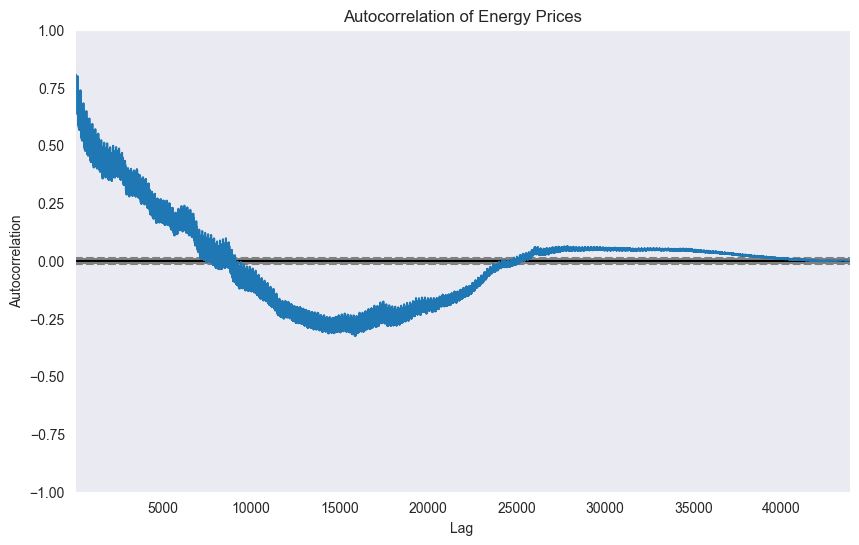

In [ ]:
# Autocorrelation Plot: Relationship between a time-series data point and its past values (lags).
# 1.0: Perfectly positively correlated (current and past values move in the same direction).
# 0.0: No correlation (random relationship between current and past values).
# -1.0: Perfectly negatively correlated (current and past values move in opposite directions).

from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(df_prices_copy['Price'])
plt.title("Autocorrelation of Energy Prices")
plt.show()

This chart represents the autocorrelation of energy prices as a function of lag, which assesses how energy prices are correlated with themselves over time. At lag 0, the autocorrelation is highest, as expected, since the data is perfectly correlated with itself at the same point in time. As the lag increases, the autocorrelation gradually decreases, indicating that the dependency between energy prices weakens over time. The negative region suggests a phase where past prices are inversely correlated with future prices. At higher lags, the autocorrelation starts to rebound, hinting at some recurring or periodic behavior in energy prices at larger time intervals. The shaded area represents the confidence intervals, where values outside these bands are statistically significant, indicating strong correlations (positive or negative). Overall, this chart may reveal patterns or seasonal trends in energy prices, suggesting that fluctuations repeat at specific intervals. <br>
Thereby, lag represents the time difference between two observations in the energy price time series. Lag 0 compares each value with itself, while higher lags compare values separated by increasing time intervals (e.g., lag 1 compares prices at time t with t-1). The x-axis shows these lag values, with higher lags indicating comparisons over longer time gaps.

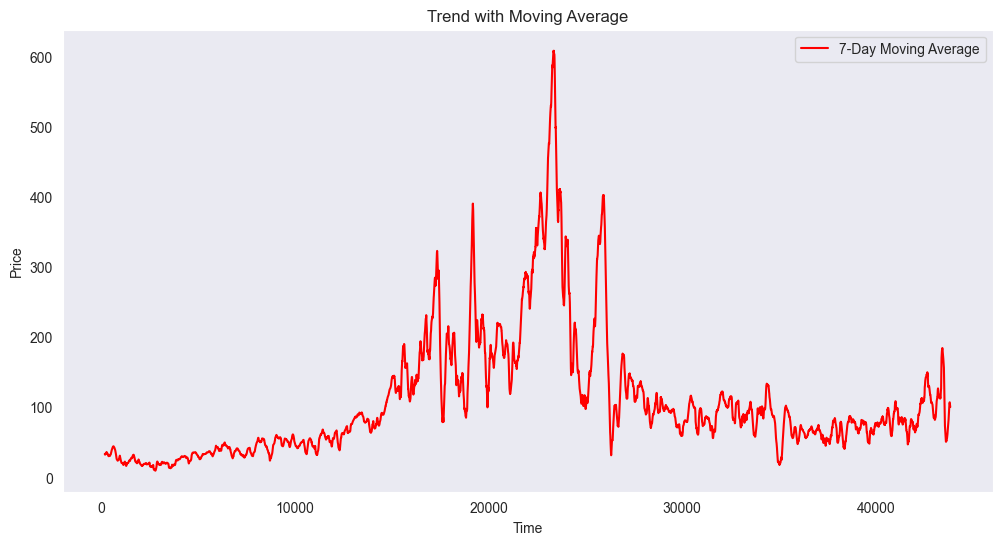

In [ ]:
# 7-day rolling average
df_prices_copy['7-day MA'] = df_prices_copy['Price'].rolling(window=7*24).mean()
plt.figure(figsize=(12, 6))
plt.plot(df_prices_copy.index, df_prices_copy['7-day MA'], label='7-Day Moving Average', color='red')
plt.title('Trend with Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

This chart displays the trend of energy prices over time, smoothed using a 7-day moving average. Initially, prices are relatively stable at lower levels, but a sharp upward trend begins around the middle of the timeline, leading to significant peaks. The chart shows high volatility, with pronounced price spikes and a notable peak at the highest price level near the center. Following this peak, prices decline and stabilize, though some fluctuations persist. The 7-day moving average smooths out short-term noise, highlighting the broader trends and volatility, which may reflect market events or seasonal influences.

In [ ]:
# clean up
del(df_prices_copy)

#### Deal with Negative Values: Log Transformation
The plots show that there are outliers in the data. Especially the negative price of -500 seems to be an error in the data. For our prediction we have to decide how to deal with outliers such that our predictive model is not negatively influenced by them. <br><br>
For that purpose, we decided to use Log Transformation. This method keeps the outliers in the data as they make the model more robust and generalizable. A transformation is applied to deal with the outliers. The corresponding code can be found in the section "Predictive Modelling".


### Weather Data: Hourly Air Temperature, Wind Speed, and Minutes of Sunshine from Deutsche Wetterdienst
The Deutsche Wetterdienst (DWD) provides historical and recent data on weather variables. We decided to include the Air Temperature, Wind Speed, and Minutes of Sunshine per Hour in our analysis. These values can be assumed to possibly have an influence on the energy price by impacting the energy demand for heating and cooling, the amount of energy produced by wind turbines, and the amount of energy produced by photovoltaics.

In [ ]:
# load weather datasets
df_sun = pd.read_csv("final_dataset_SunHours_SD_SO.csv")
df_temperature = pd.read_csv("final_dataset_Temperature_TT_TU.csv")
df_wind = pd.read_csv("final_dataset_Wind_F.csv")

df_sun = df_sun.drop('Unnamed: 0', axis=1)
df_temperature = df_temperature.drop('Unnamed: 0', axis=1)
df_wind = df_wind.drop('Unnamed: 0', axis=1)

#### Preprocessing
The data needed some preprocessing to get a suitable format we can work with. Additional to basic preprocessing (checking for null values, formatting, etc.), the following steps were completed for each weather variable:
1. Download of zip-files from DWD and extraction of txt-files, that contain the data.
2. Merge and convertion of all txt-files to one csv-file, that contains all data of all weather stations.
3. During step 1 and 2: Filter the data such that the final dataset includes data for the specified timeframe.
4. Filter the weather stations to get one weather station per German state, that is nearest to the state's centroid.
5. Based on the resulting 16 weather stations, calculate the mean value for the respective variable and save this value for each timestamp.
<br>

This results in one dataset for each weather variable, that contains hourly timestamps and one value per timestamp. The code for the above-mentioned steps can be found in the appendix. As an example we included the code for preprocessing the data of the variable Wind Speed. However, the code for the other weather variables is nearly identical.

In [ ]:
# In total there should be 43.848 data points (having a total of (2×8,784)+(3×8,760) hours between 01.01.2020 and 31.12.2024). Both, in the Temperature and the Wind dataset, there are exactly 43.848 data points. However, the dataset on sun hours has less datapoints. So let's do some analysis to find the reason for that.

df_sun['MESS_DATUM'] = pd.to_datetime(df_sun['MESS_DATUM'])
time_counts = df_sun['MESS_DATUM'].dt.strftime('%H:%M:%S').value_counts()

# There are missing values between 21:00:00 and 02:00:00. It can be assumed that in Germany there are no sun hours during this time. Therefore, in the following the missing values are replaced by 0.
# Merge all three datasets to one big dataset and replace missing values in the sun hours dataset with 0
df_temperature['MESS_DATUM'] = pd.to_datetime(df_temperature['MESS_DATUM'])
df_wind['MESS_DATUM'] = pd.to_datetime(df_wind['MESS_DATUM'])
df_sun['MESS_DATUM'] = pd.to_datetime(df_sun['MESS_DATUM'])
df_tmp = df_temperature.merge(df_wind, on='MESS_DATUM', how='inner')
df_merged = pd.merge(df_tmp, df_sun, on='MESS_DATUM', how='left')
df_merged['SunHours_SD_SO'] = df_merged['SunHours_SD_SO'].fillna(0) # Replace NaN values in 'Sun_Hours' with 0

# clean up and save the weather dataframe to csv
df_weather = df_merged
del(df_merged)
df_weather['MESS_DATUM'] = pd.to_datetime(df_weather['MESS_DATUM'])
df_weather.to_csv('merged_weather_dataset.csv')

df_weather.describe()

,MESS_DATUM,Temperature_TT_TU,Wind_F,SunHours_SD_SO
count,43848,43848.000000,43848.000000,43848.000000
mean,2022-07-02 11:30:00,10.683687,3.571385,12.359677
min,2020-01-01 00:00:00,-12.340000,1.010000,0.000000
25%,2021-04-01 17:45:00,5.030000,2.430000,0.000000
50%,2022-07-02 11:30:00,10.180000,3.220000,0.190000
75%,2023-10-02 05:15:00,16.110000,4.380000,22.070000
max,2024-12-31 23:00:00,34.850000,13.060000,60.000000
std,NaN,7.296101,1.554888,17.720873


#### Visualize the Data

In [ ]:
# create copy of weather dataframe to work with
df_weather_copy = df_weather.copy()

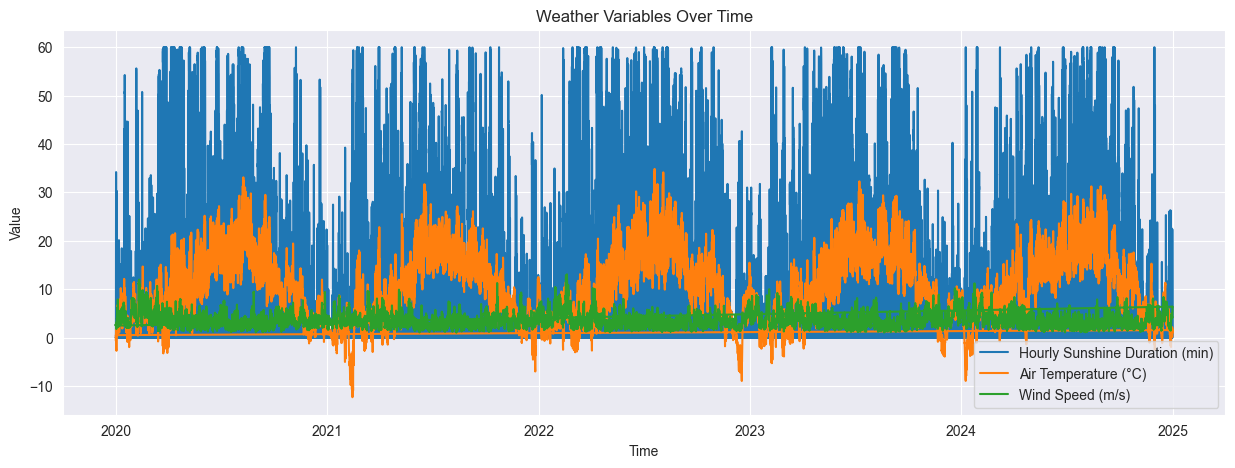

In [ ]:
# Plot a time series to give an overview over the values of the variables over time

plt.figure(figsize=(15, 5))
plt.plot(df_weather_copy['MESS_DATUM'], df_weather_copy['SunHours_SD_SO'], label='Hourly Sunshine Duration (min)')
plt.plot(df_weather_copy['MESS_DATUM'], df_weather_copy['Temperature_TT_TU'], label='Air Temperature (°C)')
plt.plot(df_weather_copy['MESS_DATUM'], df_weather_copy['Wind_F'], label='Wind Speed (m/s)')
plt.legend()
plt.title("Weather Variables Over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


The chart shows the variation of the variables Hourly Sunshine Duration (minutes), Air Temperature (°C), and Wind Speed (m/s) from 2020 to 2025. <br>
The Hourly Sunshine Duration exhibits a seasonal pattern, with higher values during the summer months and lower values in winter, reflecting the natural variation in sunlight availability. <br>
The Air Temperature also follows a clear seasonal trend, peaking in summer and dropping in winter, with yearly cycles consistent across the timeline. <br>
The Wind Speed remains relatively stable with small fluctuations, showing no clear seasonal dependency.

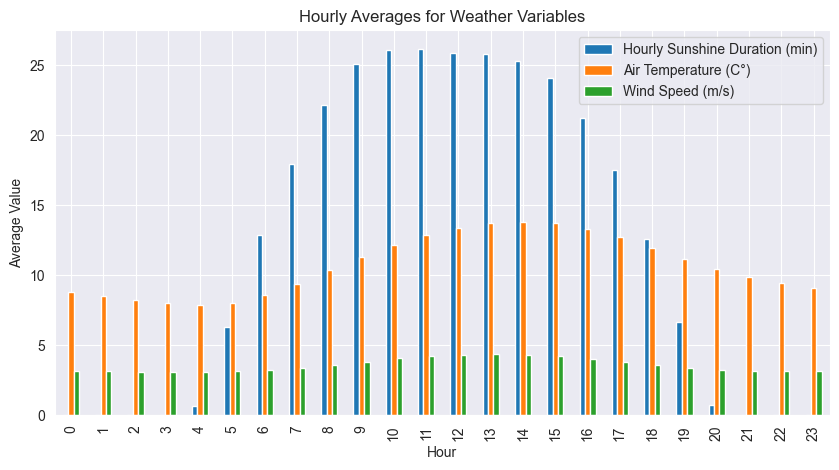

In [ ]:
# Plot a bar chart to show the hourly average value for each variable

df_weather_copy['hour'] = df_weather_copy['MESS_DATUM'].dt.hour

# Group by month and calculate the average for each variable
monthly_avg = df_weather_copy.groupby('hour')[['SunHours_SD_SO', 'Temperature_TT_TU', 'Wind_F']].mean()

monthly_avg = monthly_avg.rename(columns={
    'SunHours_SD_SO': 'Hourly Sunshine Duration (min)',
    'Temperature_TT_TU': 'Air Temperature (C°)',
    'Wind_F': 'Wind Speed (m/s)'
})

# Plotting the bar chart
monthly_avg.plot(kind='bar', figsize=(10, 5))

# Set the title and labels
plt.title("Hourly Averages for Weather Variables")
plt.xlabel("Hour")
plt.ylabel("Average Value")

plt.xticks(ticks=range(24))

plt.show()

The Hourly Sunshine Duration peaks between 10:00 and 15:00, corresponding to daylight hours, with no sunshine during the night. <br>
The Air Temperature rises steadily in the morning, reaching its maximum in the early afternoon before gradually decreasing toward the evening. <br>
The Wind Speed remains relatively consistent throughout the day with minor fluctuations, showing less dependency on the time of day.

In [ ]:
df_weather_copy = pd.read_csv('merged_weather_dataset.csv')

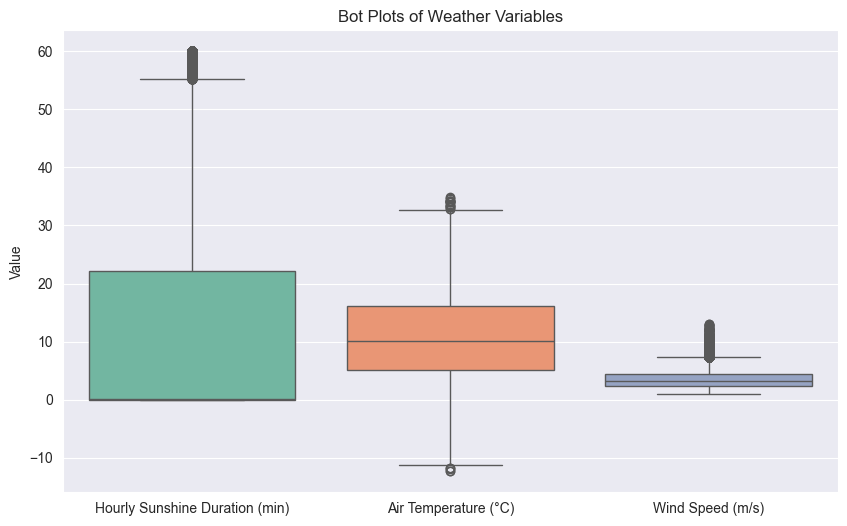

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df_weather_copy['SunHours_SD_SO'], df_weather_copy['Temperature_TT_TU'], df_weather_copy['Wind_F']], palette='Set2')
plt.title('Bot Plots of Weather Variables')
plt.xticks([0, 1, 2], ['Hourly Sunshine Duration (min)', 'Air Temperature (°C)', 'Wind Speed (m/s)'])
plt.ylabel('Value')
plt.show()

The box plot illustrates the distribution of the three weather variables.<br>
 Hourly sunshine duration shows significant variability, with a median of close to 0 minutes, an interquartile range (IQR) between 0 and 20 minutes, and outliers reaching up to 60 minutes, indicating occasional extended sunny periods. <br>
 Air temperature has a central distribution with a median near 10°C, an IQR spanning from approximately 5°C to 17°C, and a few extreme outliers both above and below the whiskers.<br>
  Wind speed exhibits the most consistency, with a median close to 3 m/s, a narrow IQR, and occasional outliers indicating higher speeds. <br>
  Overall, the chart highlights substantial variability in sunshine and temperature compared to the relatively stable wind speeds.

In [ ]:
# clean up
del(df_weather_copy)


### Energy Consumption and Generation Data: Hourly Day-Ahead Data on Electricity Consumption and Generation in Germany from SMARD
SMARD.de provides data on the energy consumption and energy generation in Germany. The data can be downloaded on the website. We decided to use the forecasted day-ahead data instead of the actual generation and consumption data. Since we want to predict the day-ahead prices, it seems more reasonable to also use the day-ahead generation and consumption data. Furthermore, when using the day-ahead data, we are able to train our model up until the last hour before the target day, making the model more precise by including the most recent data.

In [ ]:
# load energy market datasets
df_consumption = pd.read_csv("Electricity_Forecasted_Consumption.csv")
df_generation = pd.read_csv("Electricity_Forecasted_Generation.csv")

#### Preprocessing
During the preprocessing, we had to deal with issues due to the German time change. Similar to the prices dataset, the consumption and generation datasets both have 5 duplicated values, that arise from the German time change in autumn: The consumption and generation datasets have values only for the actually existing timestamps (meaning none for the spring time change and two for the autumn time change). <br>
Again, we decided to use the value that was measured later for the autumn time change as it can be considered to be the more present one.

In [ ]:
df_consumption = df_consumption.drop('Unnamed: 0', axis=1)
df_generation = df_generation.drop('Unnamed: 0', axis=1)

duplicates = df_consumption[df_consumption['MESS_DATUM'].duplicated(keep=False)] # Find duplicate rows in df_consumption based on the 'MESS_DATUM' column

# create new dataframe without duplicates (the second value should always be kept since it was measured later and can therefore be considered to be the "correct" value)
df_consumption_no_duplicates = df_consumption.drop_duplicates(subset='MESS_DATUM', keep='last')
df_consumption = df_consumption_no_duplicates.copy()

duplicates = df_generation[df_generation['MESS_DATUM'].duplicated(keep=False)] # Find duplicate rows in df_generation based on the 'MESS_DATUM' column

# create new dataframe without duplicates (the second value should always be kept since it was measured later and can therefore be considered to be the "correct" value)
df_generation_no_duplicates = (df_generation.drop_duplicates(subset='MESS_DATUM', keep='last'))
df_generation = df_generation_no_duplicates.copy()

# clean up
del(df_consumption_no_duplicates)
del(df_generation_no_duplicates)

In [ ]:
df_consumption.describe()

,Con: Total (grid load) [MWh] Calculated resolutions,Con: Residual load [MWh] Calculated resolutions
count,43843.000000,43843.000000
mean,54433.887747,33674.121867
std,9969.223157,13329.177036
min,0.000000,0.000000
25%,46991.500000,24973.375000
50%,54461.500000,34574.250000
75%,62301.875000,43060.125000
max,78154.250000,68654.250000


In [ ]:
df_generation.describe()

,Gen: Total [MWh] Original resolutions,Gen: Photovoltaics and wind [MWh] Calculated resolutions,Gen: Wind offshore [MWh] Calculated resolutions,Gen: Wind onshore [MWh] Calculated resolutions,Gen: Photovoltaics [MWh] Calculated resolutions,Gen: Other [MWh] Original resolutions
count,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000
mean,52614.764044,20913.879177,2857.672941,11925.617847,6130.770442,31737.549774
std,11800.141514,12807.007436,1891.898836,9589.485037,9429.201539,9807.854800
min,0.000000,0.000000,15.500000,0.000000,0.000000,0.000000
25%,44134.000000,10108.250000,1082.750000,4399.000000,0.000000,24350.125000
50%,52782.000000,19174.750000,2691.500000,8982.750000,232.500000,30940.500000
75%,60965.000000,30019.500000,4582.500000,17152.750000,9774.625000,38187.250000
max,87604.000000,70015.750000,6772.750000,46769.250000,48567.500000,64328.250000


#### Visualize the Data

In [ ]:
df = df_consumption.merge(df_generation, on='MESS_DATUM', how='left')
df['MESS_DATUM'] = pd.to_datetime(df['MESS_DATUM'])
df['year'] = df['MESS_DATUM'].dt.year
df['hour'] = df['MESS_DATUM'].dt.hour

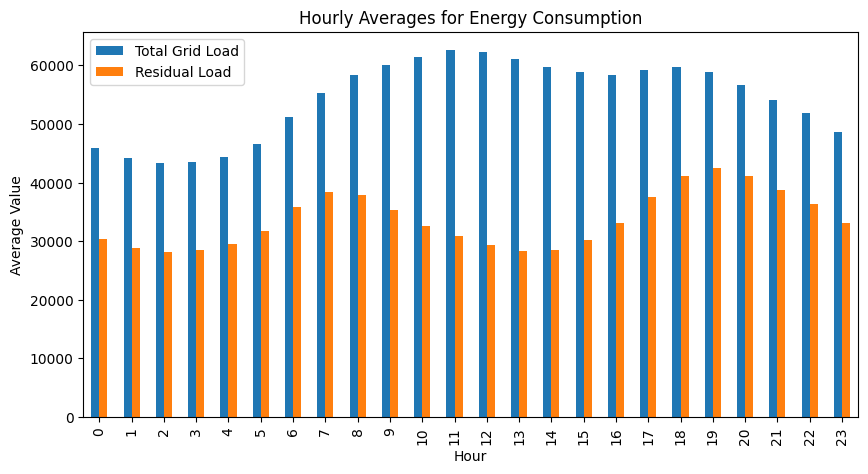

In [ ]:
# Group by month and calculate the average for each variable
monthly_avg = df.groupby('hour')[['Con: Total (grid load) [MWh] Calculated resolutions', 'Con: Residual load [MWh] Calculated resolutions']].mean()

monthly_avg = monthly_avg.rename(columns={
    'Con: Total (grid load) [MWh] Calculated resolutions': 'Total Grid Load',
    'Con: Residual load [MWh] Calculated resolutions': 'Residual Load',

})

# Plot the bar chart
monthly_avg.plot(kind='bar', figsize=(10, 5))

# Set the title and labels
plt.title("Hourly Averages for Energy Consumption")
plt.xlabel("Hour")
plt.ylabel("Average Value")
plt.xticks(ticks=range(24))
plt.show()

The Total Grid Load follows a daily pattern of being low during nighttime (0:00–6:00), rising in the morning (6:00–9:00), peaking in the afternoon (10:00–15:00), and gradually decreasing in the evening (18:00–23:00). The Residual Load, which is the portion of the demand met by non-renewable sources, closely mirrors this pattern but is consistently lower due to renewable energy contributions. The gap between the two widens significantly during daytime hours (10:00–16:00), reflecting peak renewable generation, especially from solar power. At night, the gap narrows as renewables contribute less, and conventional energy sources cover most of the demand. This highlights the significant but time-dependent role of renewables in reducing reliance on non-renewables.

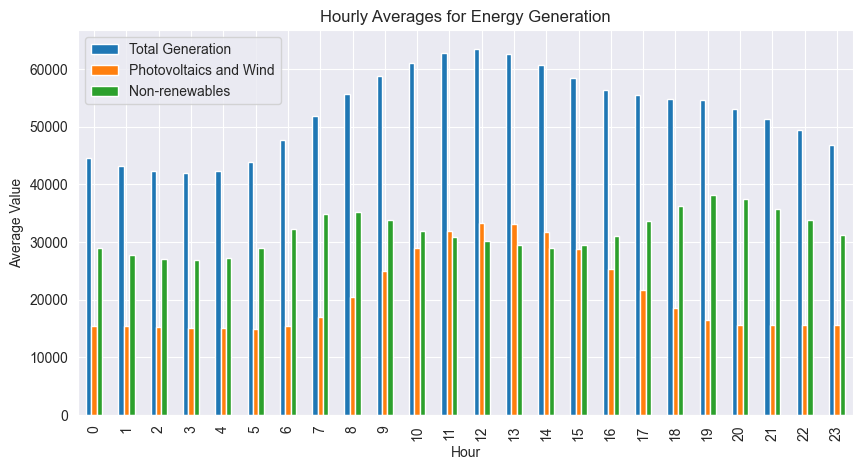

In [ ]:
# Group by month and calculate the average for each variable
monthly_avg = df.groupby('hour')[['Gen: Total [MWh] Original resolutions', 'Gen: Photovoltaics and wind [MWh] Calculated resolutions',  'Gen: Other [MWh] Original resolutions']].mean()

monthly_avg = monthly_avg.rename(columns={
    'Gen: Total [MWh] Original resolutions': 'Total Generation',
    'Gen: Photovoltaics and wind [MWh] Calculated resolutions': 'Photovoltaics and Wind',
    'Gen: Other [MWh] Original resolutions': 'Non-renewables'
})

# Plot the bar chart
monthly_avg.plot(kind='bar', figsize=(10, 5))

# Set the title and labels
plt.title("Hourly Averages for Energy Generation")
plt.xlabel("Hour")
plt.ylabel("Average Value")
plt.xticks(ticks=range(24))
plt.show()


Total Generation peaks during the daytime (10:00–15:00) when demand is highest and decreases during the evening and nighttime. Photovoltaics and Wind contribute significantly during daylight hours (8:00–17:00), with a peak around midday due to solar energy, but drop to lower values at night. Non-renewables remain relatively stable throughout the day, compensating for the variability and absence of renewable generation. This demonstrates how non-renewables ensure a consistent energy supply, particularly during nighttime, while renewables reduce reliance on non-renewables during the day.

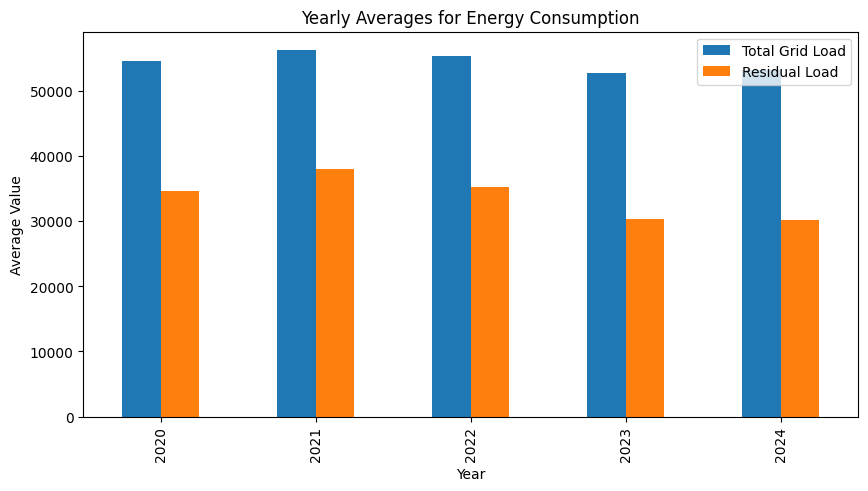

In [ ]:
# Group by month and calculate the average for each variable
monthly_avg = df.groupby('year')[['Con: Total (grid load) [MWh] Calculated resolutions', 'Con: Residual load [MWh] Calculated resolutions']].mean()

monthly_avg = monthly_avg.rename(columns={
    'Con: Total (grid load) [MWh] Calculated resolutions': 'Total Grid Load',
    'Con: Residual load [MWh] Calculated resolutions': 'Residual Load',

})

# Plot the bar chart
monthly_avg.plot(kind='bar', figsize=(10, 5))

# Set the title and labels
plt.title("Yearly Averages for Energy Consumption")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.xticks(ticks=range(5))
plt.show()

The Total Grid Load remains consistent over the years with minimal fluctuations and significantly higher values compared to the residual load. This indicates its dominant role in overall energy consumption. The Residual Load is considerably lower and also relatively stable over time. Both categories display a steady trend, suggesting no major changes in energy consumption patterns during this period, besides of a slight decrease in Total Grid Load and Residual Load since 2021.

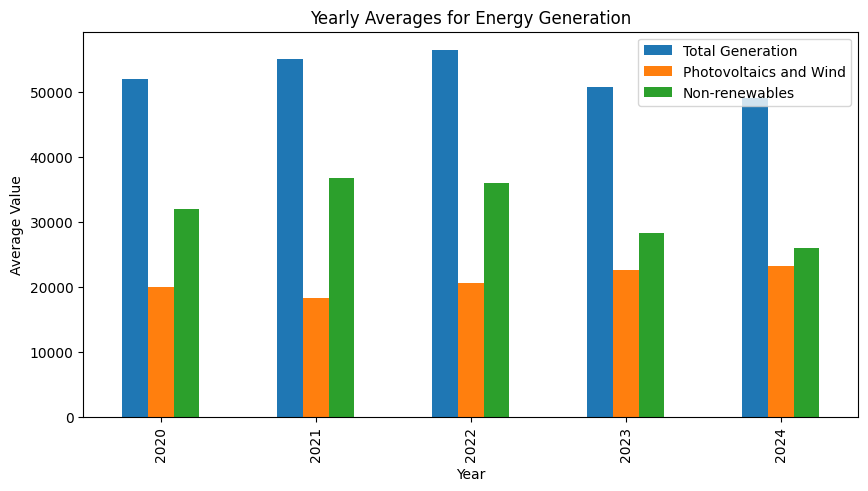

In [ ]:
# Group by month and calculate the average for each variable
monthly_avg = df.groupby('year')[['Gen: Total [MWh] Original resolutions', 'Gen: Photovoltaics and wind [MWh] Calculated resolutions',  'Gen: Other [MWh] Original resolutions']].mean()

monthly_avg = monthly_avg.rename(columns={
    'Gen: Total [MWh] Original resolutions': 'Total Generation',
    'Gen: Photovoltaics and wind [MWh] Calculated resolutions': 'Photovoltaics and Wind',
    'Gen: Other [MWh] Original resolutions': 'Non-renewables'
})

# Plot the bar chart
monthly_avg.plot(kind='bar', figsize=(10, 5))

# Set the title and labels
plt.title("Yearly Averages for Energy Generation")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.xticks(ticks=range(5))
plt.show()

The Total Generation remains consistently high throughout the years, indicating stability in overall energy generation. The contribution of Non-renewables is substantial. In contrast, Photovoltaics and Wind show lower values, representing a smaller portion of the energy mix. Across the years, Photovoltaics and Wind increase in value and Non-Renewables decrease, suggesting a trend towards increasing the share of renewables in the energy mix.

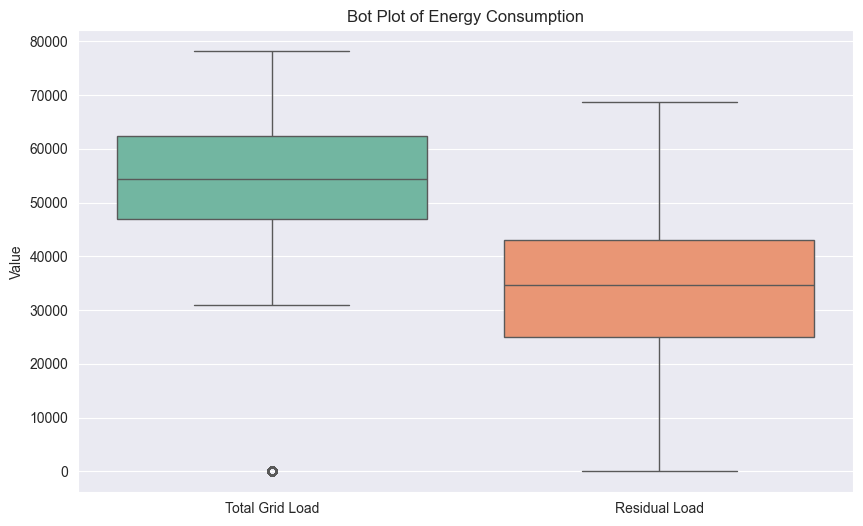

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df['Con: Total (grid load) [MWh] Calculated resolutions'], df['Con: Residual load [MWh] Calculated resolutions']], palette='Set2')
plt.title('Bot Plots of Energy Consumption')
plt.xticks([0, 1], ['Total Grid Load', 'Residual Load'])
plt.ylabel('Value')
plt.show()

For Total Grid Load, the median value is around 55,000, meaning half the data points are above this value and half are below. The interquartile range (IQR) is rather narrow, indicating moderate to little variation. There is one outlier below 20,000, which suggests a rare event of very low total grid load. <br>
For Residual Load, the median value is around 35,000 and the IQR is slightly larger than for the Total Grid Load. This suggests, that while the median of the Residual Load is lower than of the Total Load, the variation is higher, likely due to variation in consumption of renewable energy sources.

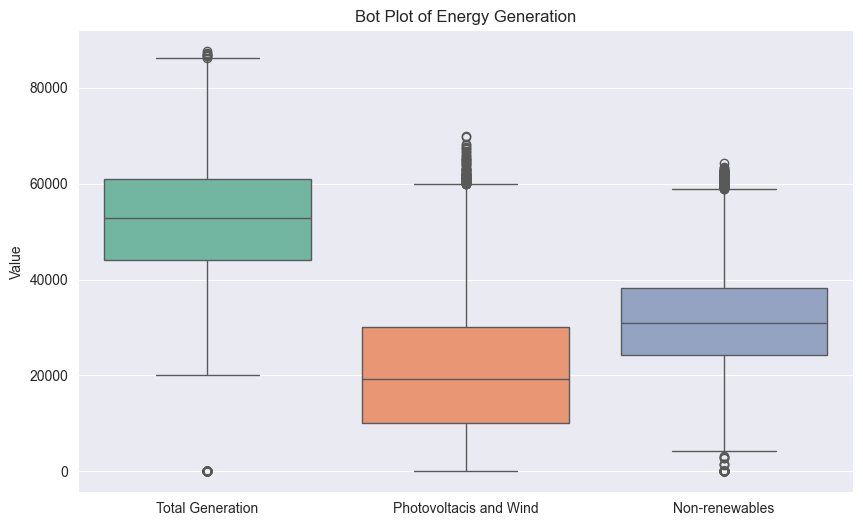

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df['Gen: Total [MWh] Original resolutions'], df['Gen: Photovoltaics and wind [MWh] Calculated resolutions'], df['Gen: Other [MWh] Original resolutions']], palette='Set2')
plt.title('Bot Plots of Energy Generation')
plt.xticks([0, 1, 2], ['Total Generation', 'Photovoltacis and Wind', 'Non-renewables'])
plt.ylabel('Value')
plt.show()

For Total Generation, the median value is around 50,000, meaning half the data points are above this value and half are below. The interquartile range (IQR) is moderately large, indicating moderate variation. There is one outlier below 20,000, which suggests a rare event of very low total energy generation. <br>
For Photovoltaics and Wind, the median value is around 20,000 and therefore lower compared to the other categories. In comparison, the IQR is large, indicating non-consistent generation. The lower whisker extends to very low values, indicating that at times, generation from photovoltaics and wind can be minimal or even zero. A few outliers represent unusual spikes in renewable energy generation, likely during periods of high wind or sunshine. <br>
For Non-renewables, the median is around 30,000, with the IQR being more narrow than for the other two box-plots, demonstrating less variability. A few outliers on the lower end and several outliers on the higher end indicate instances of significantly reduced or increased non-renewable generation.

In [ ]:
# clean up
del(df)


### Costs and Imports of Non-Renewables
Non-Renewable Energy Sources as part of the total Energy Mix have an impact on the final Energy Price. Therefore, we intended to include import or price data of coal and gas in our prediction. However, we did not find reliable data for a reasonable timespan, that is free for us to use. <br><br>
We did find data on crude oil imports (https://www.destatis.de/EN/Themes/Economy/Foreign-Trade/Tables/crude-oil-monthly.html). But since crude oil is not a significant factor for the german electricity market, we decided to not include that data. <br>
Through the EEX we have access to the day-ahead price for Natural Gas (https://www.eex.com/en/market-data/market-data-hub/natural-gas/indices). But we do not have free access to historical data, which we need for training our model. <br>
For Coal we found data on the monthly coal price index worldwide from November 2022 to November 2024 (https://www.statista.com/statistics/1303005/monthly-coal-price-index-worldwide/). Even though this data is not specifically for Germany, it could still be useful for our prediction. However, de did not get reliable data on the current or day-ahead coal price. This being added to the historical data not spanning our specified timespan from 2020 to 2024, we decided to also not include this factor into our prediction.  <br><br>
Even though data on price and import of non-renewable energy sources would provide valuable insights into the German energy price, we were not able to get the required data to include that factor into our model. This is due to the limited timeframe of our project and missing financial resources. Future research could connect here.

---
## Correlation Analysis
In order to select the final variables to include in our prediction, in the following section we calculate the correlation coefficients between the previously analyzed variables and the energy price. Even though a high correlation coefficient does not necessarily indicate a causal relationship between the variable and the energy price, it does help to identify variables that are connected with the energy price and may improve our prediction. <br>
We chose to calculate the Pearson's correlation coefficient as well as the Spearman's correlation coefficient to gain insights into potential linear relationship as well as non-linear relationship between the variables. If both coefficients show a moderate to strong relationship, we can assume a meaningful connection between the respective variable and the energy price, whether linear or non-linear. If Pearson’s correlation is weak but Spearman’s is moderate to strong, we can assume a non-linear but monotonic connection.


### Correlation Between Weather Variables and Energy Price
When merging the weather and prices dataframes, we again encountered issues due to the German time change. We have 5 values that are in df_weather, but not in df_prices. These values are from the spring time change, where no price values are available. <br>
The weather dataset has one value for each timestamp continuously (not paying attention to the time changes). The prices dataset has values only for the actually existing timestamps (meaning none for the spring time change and two for the autumn time change). <br>
We decided to not include the timestamps of the spring time change (as we don't have price values for that) and use the later one for the autumn time change (as it's the more recent one; already did that when cleaning the price dataset).

In [ ]:
df_all_weather = pd.merge(df_weather, df_prices, on='MESS_DATUM', how='left')
null_rows = df_all_weather[df_all_weather['Price'].isnull()]
df_all_cleaned = df_all_weather.dropna(subset=['Price']) # drop the rows in which we don't have a price

# clean up
df_all_weather = df_all_cleaned
del(df_all_cleaned)

df = df_all_weather.copy()
df_all_weather.describe()

,MESS_DATUM,Temperature_TT_TU,Wind_F,SunHours_SD_SO,Price
count,43843,43843.000000,43843.000000,43843.000000,43843.000000
mean,2022-07-02 11:45:45.879616,10.684289,3.571406,12.361086,107.239543
min,2020-01-01 00:00:00,-12.340000,1.010000,0.000000,-500.000000
25%,2021-04-01 18:30:00,5.030000,2.430000,0.000000,41.365000
50%,2022-07-02 12:00:00,10.180000,3.220000,0.190000,81.760000
75%,2023-10-02 05:30:00,16.110000,4.380000,22.070000,129.620000
max,2024-12-31 23:00:00,34.850000,13.060000,60.000000,936.280000
std,NaN,7.296263,1.554918,17.721392,104.452182


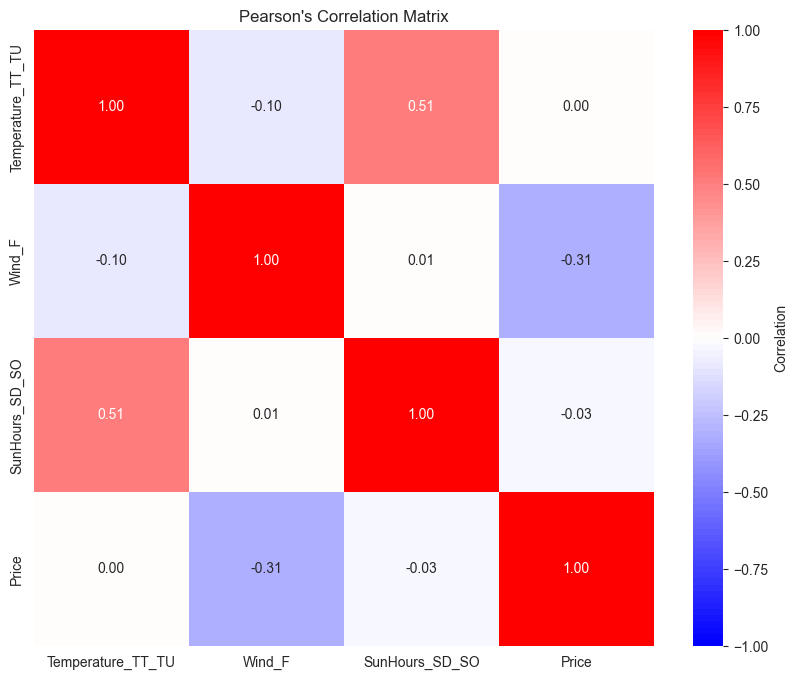

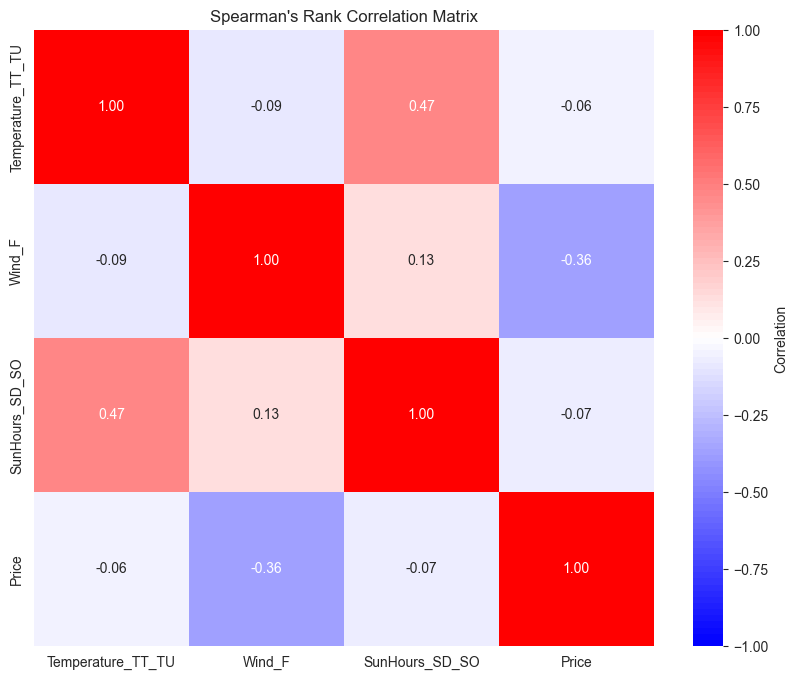

In [ ]:
pearson_corr = df[['Temperature_TT_TU', 'Wind_F', 'SunHours_SD_SO', 'Price']].corr(method='pearson')
spearman_corr = df[['Temperature_TT_TU', 'Wind_F', 'SunHours_SD_SO', 'Price']].corr(method='spearman')

cmap = LinearSegmentedColormap.from_list(
    "red_white_blue", ["blue", "white", "red"], N=100)

# Plot Pearson's Correlation Matrix with custom color map
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap=cmap, fmt='.2f', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title("Pearson's Correlation Matrix")
plt.show()

# Plot Spearman's Correlation Matrix with custom color map
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap=cmap, fmt='.2f', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title("Spearman's Rank Correlation Matrix")
plt.show()

In [ ]:
del(df)

The matrix shows a moderately negative connection between Wind Speed and Energy Price, meaning that as the Wind Speed increases the Energy Price decreases. As the Spearman's correlation coefficient is slightly higher than the Pearson's, the correlation could be dominated by its monotonic nature rather than its linearity. <br>
Regarding the other two variables, Air Temperature and Hourly Sun Duration, the correlation coefficients are weakly negative or zero. Therefore, we decided to not integrate Air Temperature and Hourly Sun Duration into our prediction.



### Correlation Between Generation and Consumption Data and Energy Price


In [ ]:
# Merge all three datasets to one big dataset

# Ensure MESS_DATUM is in datetime format in both datasets
df_consumption['MESS_DATUM'] = pd.to_datetime(df_consumption['MESS_DATUM'])
df_generation['MESS_DATUM'] = pd.to_datetime(df_generation['MESS_DATUM'])

df_temp = df_consumption.merge(df_generation, on='MESS_DATUM', how='left')
df_all_con_gen = df_prices.merge(df_temp, on='MESS_DATUM', how='left')
df = df_all_con_gen.copy()
df_all_con_gen.describe()

,MESS_DATUM,Price,Con: Total (grid load) [MWh] Calculated resolutions,Con: Residual load [MWh] Calculated resolutions,Gen: Total [MWh] Original resolutions,Gen: Photovoltaics and wind [MWh] Calculated resolutions,Gen: Wind offshore [MWh] Calculated resolutions,Gen: Wind onshore [MWh] Calculated resolutions,Gen: Photovoltaics [MWh] Calculated resolutions,Gen: Other [MWh] Original resolutions
count,43843,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000,43843.000000
mean,2022-07-02 11:45:45.879615744,107.239543,54433.887747,33674.121867,52614.764044,20913.879177,2857.672941,11925.617847,6130.770442,31737.549774
min,2020-01-01 00:00:00,-500.000000,0.000000,0.000000,0.000000,0.000000,15.500000,0.000000,0.000000,0.000000
25%,2021-04-01 18:30:00,41.365000,46991.500000,24973.375000,44134.000000,10108.250000,1082.750000,4399.000000,0.000000,24350.125000
50%,2022-07-02 12:00:00,81.760000,54461.500000,34574.250000,52782.000000,19174.750000,2691.500000,8982.750000,232.500000,30940.500000
75%,2023-10-02 05:30:00,129.620000,62301.875000,43060.125000,60965.000000,30019.500000,4582.500000,17152.750000,9774.625000,38187.250000
max,2024-12-31 23:00:00,936.280000,78154.250000,68654.250000,87604.000000,70015.750000,6772.750000,46769.250000,48567.500000,64328.250000
std,NaN,104.452182,9969.223157,13329.177036,11800.141514,12807.007436,1891.898836,9589.485037,9429.201539,9807.854800


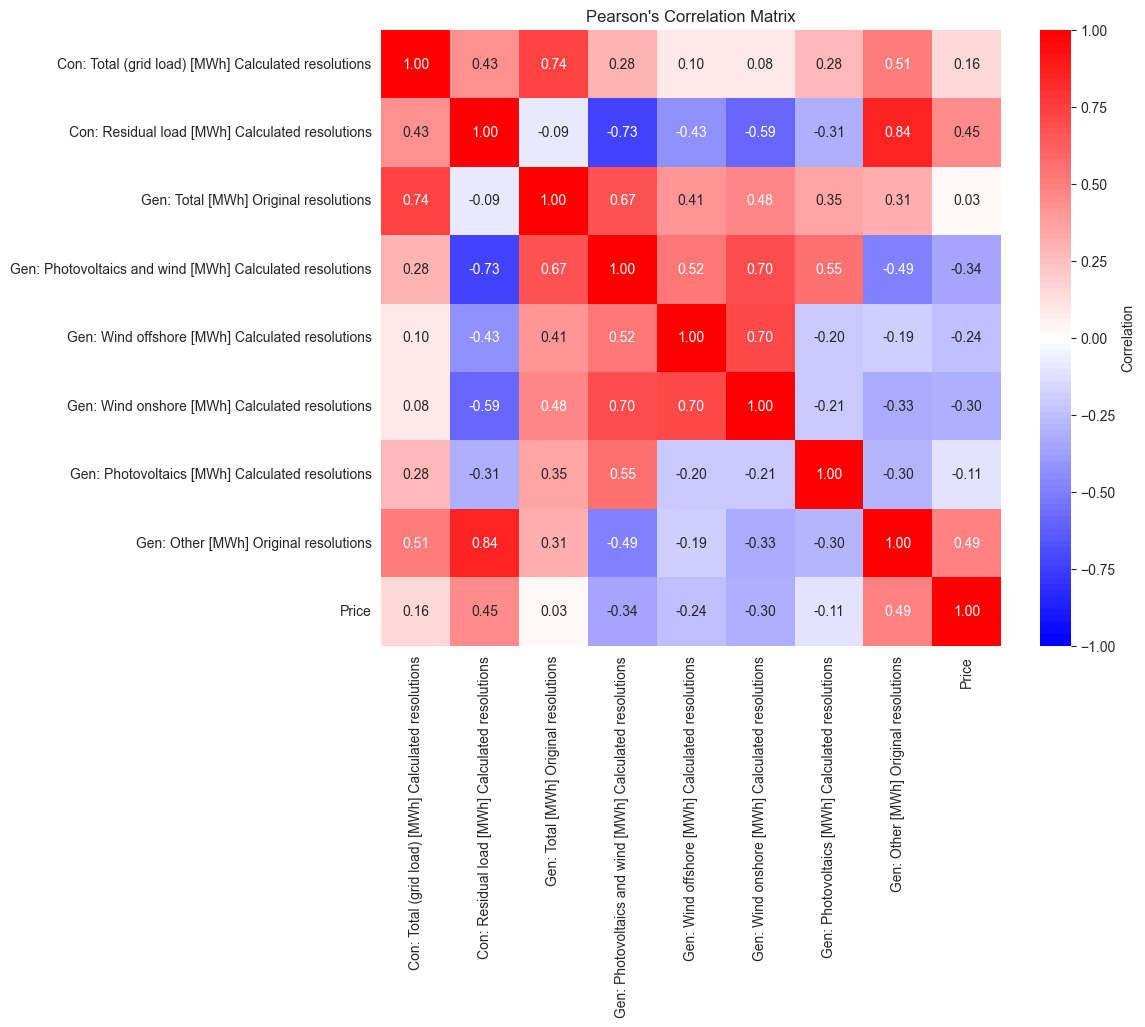

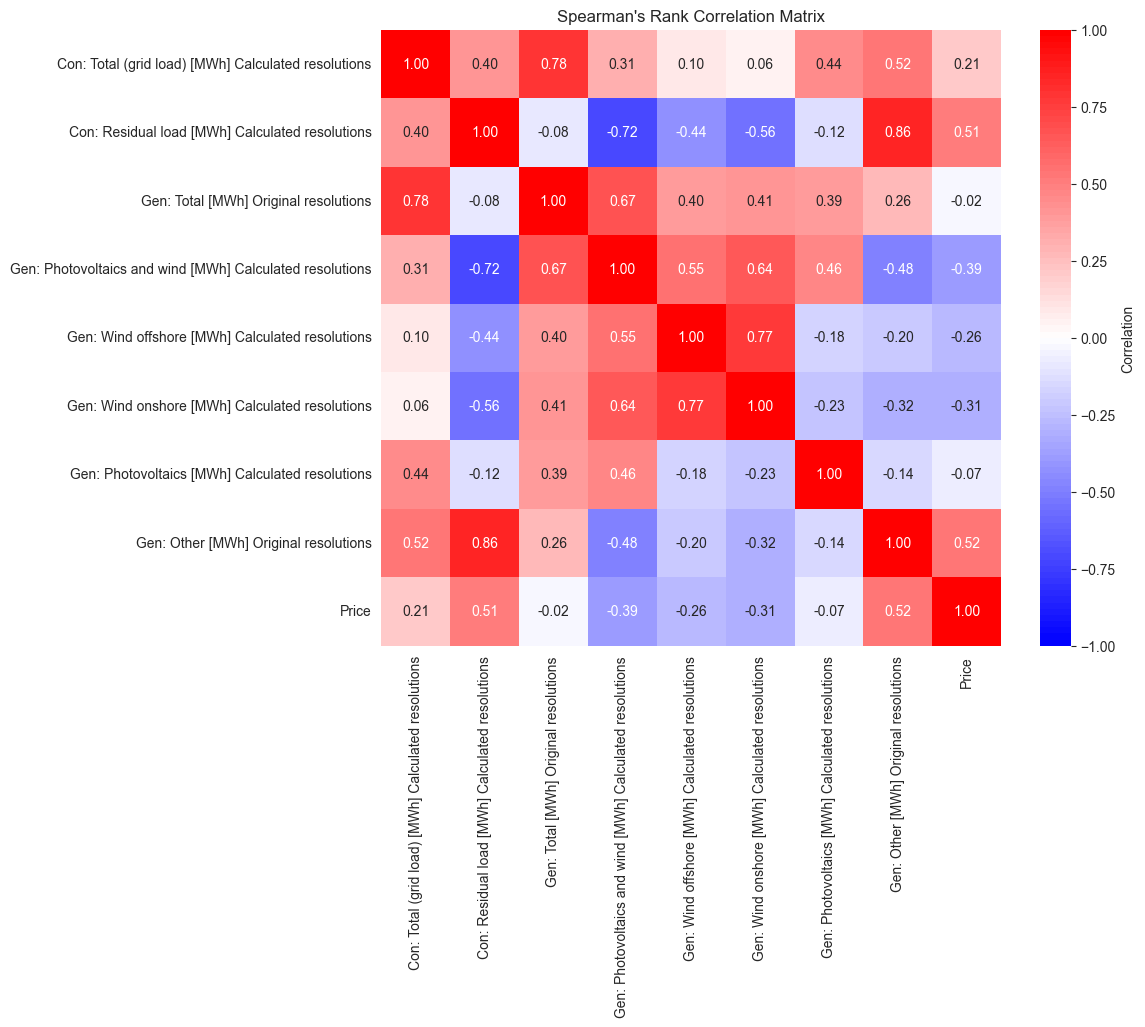

In [ ]:
pearson_corr = df[['Con: Total (grid load) [MWh] Calculated resolutions', 'Con: Residual load [MWh] Calculated resolutions', 'Gen: Total [MWh] Original resolutions', 'Gen: Photovoltaics and wind [MWh] Calculated resolutions', 'Gen: Wind offshore [MWh] Calculated resolutions', 'Gen: Wind onshore [MWh] Calculated resolutions', 'Gen: Photovoltaics [MWh] Calculated resolutions', 'Gen: Other [MWh] Original resolutions', 'Price']].corr(method='pearson')
spearman_corr = df[['Con: Total (grid load) [MWh] Calculated resolutions', 'Con: Residual load [MWh] Calculated resolutions', 'Gen: Total [MWh] Original resolutions', 'Gen: Photovoltaics and wind [MWh] Calculated resolutions', 'Gen: Wind offshore [MWh] Calculated resolutions', 'Gen: Wind onshore [MWh] Calculated resolutions', 'Gen: Photovoltaics [MWh] Calculated resolutions', 'Gen: Other [MWh] Original resolutions', 'Price']].corr(method='spearman')

cmap = LinearSegmentedColormap.from_list(
    "red_white_blue", ["blue", "white", "red"], N=100)

# Plot Pearson's Correlation Matrix with custom color map
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap=cmap, fmt='.2f', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title("Pearson's Correlation Matrix")
plt.show()

# Plot Spearman's Correlation Matrix with custom color map
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap=cmap, fmt='.2f', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title("Spearman's Rank Correlation Matrix")
plt.show()

The correlation matrix provide the following insights:
- **Consumption:** The Residual Load is moderately and positively correlated with the energy price. This means that if the Residual Load increases, then the energy price also increases. The Residual Load is defined by SMARD as "the forecasted electricity consumption minus the forecasted feed-in from photovoltaic installations and wind power stations (onshore and offshore)". In simpler words, the Residual Load reflects the amount of the energy consumption that is satisfied by non-renewable energy sources.
- **Generation:** The total generation by Photovoltaics and Wind is weakly and negatively correlated with the energy price. The category "Other" is moderately and positively correlated with the energy price. <br>
If more energy comes from Photovoltaics and Wind, then the energy price decreases. On the other hand, if the category "Other" generates more energy, then the energy price increases. This observation seems reasonable as the category "Others" includes non-renewable energy sources, which have a significant impact on the energy price. <br><br>

As a conclusion, we decided to include the forecasted residual load, the forecasted electricity generation by Photovoltaics and Wind and the forecasted electricity generation by "Others" into our predictive model as these variables have the highest correlation coefficients.


In [ ]:
# save the relevant columns as csv file
df = df[['MESS_DATUM', 'Con: Residual load [MWh] Calculated resolutions', 'Gen: Photovoltaics and wind [MWh] Calculated resolutions', 'Gen: Other [MWh] Original resolutions']]
df.to_csv('final_dataset_consumption_generation.csv')

# clean up
del(df)

---
## Create the Final Dataset

In [ ]:
# merge all relevant variables into one final dataset

df_all_weather = df_all_weather[['MESS_DATUM', 'Price', 'Wind_F']]
df_all_con_gen = df_all_con_gen[['MESS_DATUM', 'Con: Residual load [MWh] Calculated resolutions', 'Gen: Photovoltaics and wind [MWh] Calculated resolutions', 'Gen: Other [MWh] Original resolutions']]

df_final_dataset = df_all_weather.merge(df_all_con_gen, on='MESS_DATUM', how='left')
df_final_dataset.rename(columns={'MESS_DATUM': 'Start_date'}, inplace=True)

df_final_dataset.to_csv("combined_data.csv")

---
# Phase 4: Predictive Modelling


I chose a Long Short-Term Memory (LSTM) neural network, a type of recurrent neural network (RNN) well-suited for time-series forecasting due to its ability to capture long-term dependencies in sequential data. LSTMs are particularly effective for energy market forecasting, where trends depend on historical patterns and seasonal variations.

**Data Preparation:**
Collected historical data from 2020 to 2024, including energy prices and relevant features such as wind, consumption residual load, and generation from photovoltaic and other resources.
Scaled the features using MinMaxScaler to improve model convergence and stability.

**Model Design:**
Defined an LSTM model with a sequential architecture consisting of LSTM layers and dense output layers.
Configured hyperparameters such as the number of hidden units, sequence length, batch size, and learning rate.

**Training Process:**
Split the data into training and testing sets, ensuring sequential integrity.
Trained the model using the Adam optimizer and MSE loss function.
Monitored training loss to prevent overfitting.

**Prediction and Post-Processing:**
Generated day-ahead hourly energy price forecasts for January and February 2025, including predictions for February 5, 2025.
Applied inverse transformation using the scaler to recover the original energy price values.

**Results:**
Extracted and displayed predictions for specific dates, such as February 5, 2025, showing the hourly forecasted prices after inverse scaling.

**Reference:**

*Malte Lehna, Fabian Scheller, and Helmut Herwartz. Forecasting day-ahead
electricity prices: A comparison of time series and neural network models
taking external regressors into account. Energy Economics, 106:105742, 2022.*

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('combined_data.csv')
df

,Start date,price,Wind_F,Con: Residual load [MWh] Calculated resolutions,Gen: Photovoltaics and wind [MWh] Calculated resolutions,Gen: Other [MWh] Original resolutions
0,2020-01-01 00:00:00,41.88,2.46,39394.25,6504.50,31518.50
1,2020-01-01 01:00:00,38.60,2.60,36967.25,6897.00,30030.00
2,2020-01-01 02:00:00,36.55,2.49,35458.50,7479.50,28973.50
3,2020-01-01 03:00:00,32.32,2.45,34883.25,7952.50,28520.50
4,2020-01-01 04:00:00,30.85,2.57,34888.00,8065.00,28201.00
...,...,...,...,...,...,...
43838,2024-12-31 19:00:00,67.77,5.59,17415.75,39244.25,23327.75
43839,2024-12-31 20:00:00,35.56,5.72,12910.25,41063.50,21203.50
43840,2024-12-31 21:00:00,15.70,5.98,8953.00,42510.00,19208.00
43841,2024-12-31 22:00:00,9.06,6.39,5462.00,42708.75,17710.25


#### Deal with Negative Values: Log Transformation
The plots show that there are outliers in the data. Especially the negative price of -500 seems to be an error in the data. For our prediction we have to decide how to deal with outliers such that our predictive model is not negatively influenced by them. <br><br>
For that purpose, we decided to use Log Transformation. This method keeps the outliers in the data as they make the model more robust and generalizable. A transformation is applied to deal with the outliers. The corresponding code can be found in the section "Predictive Modelling".

In [ ]:
# log transformation with a specific offset to handle negative values
import numpy as np
def transmlog(x, offset=1):
    return np.sign(x) * (np.log(np.abs(x) + offset) + np.log(offset))


transformed_price = transmlog(df['price'])
df['transformed_price'] = transformed_price
df.head()

,Start date,price,Wind_F,Con: Residual load [MWh] Calculated resolutions,Gen: Photovoltaics and wind [MWh] Calculated resolutions,Gen: Other [MWh] Original resolutions,transformed_price
0,2020-01-01 00:00:00,41.88,2.46,39394.25,6504.5,31518.5,3.758406
1,2020-01-01 01:00:00,38.60,2.60,36967.25,6897.0,30030.0,3.678829
2,2020-01-01 02:00:00,36.55,2.49,35458.50,7479.5,28973.5,3.625673
3,2020-01-01 03:00:00,32.32,2.45,34883.25,7952.5,28520.5,3.506158
4,2020-01-01 04:00:00,30.85,2.57,34888.00,8065.0,28201.0,3.461037


In [ ]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = df[['transformed_price', 'Wind_F', 'Con: Residual load [MWh] Calculated resolutions',
            'Gen: Photovoltaics and wind [MWh] Calculated resolutions', 'Gen: Other [MWh] Original resolutions']].values

# Define split sizes before scaling
train_size = int(0.7 * len(data))
val_size = int(0.15 * len(data))
test_size = len(data) - train_size - val_size

train_data = data[:train_size]
val_data = data[train_size:train_size + val_size]
test_data = data[train_size + val_size:]


scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
val_data_scaled = scaler.transform(val_data)
test_data_scaled = scaler.transform(test_data)


input_length = 168
target_length = 24

def create_sequences(data, input_length, target_length):
    inputs = []
    targets = []

    for i in range(len(data) - input_length - target_length + 1):
        input_seq = data[i:i + input_length, :]
        target_seq = data[i + input_length:i + input_length + target_length, 0]
        inputs.append(input_seq)
        targets.append(target_seq)


    inputs = np.array(inputs)
    targets = np.array(targets)

    return inputs, targets

# Create sequences
X_train, y_train = create_sequences(train_data_scaled, input_length, target_length)
X_val, y_val = create_sequences(val_data_scaled, input_length, target_length)
X_test, y_test = create_sequences(test_data_scaled, input_length, target_length)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")
print("Train Inputs Shape:", X_train.shape)
print("Train Targets Shape:", y_train.shape)
print("Validation Inputs Shape:", X_val.shape)
print("Validation Targets Shape:", y_val.shape)
print("Test Inputs Shape:", X_test.shape)
print("Test Targets Shape:", y_test.shape)


def inverse_transform_targets(targets):

    targets_reshaped = targets.reshape(-1, 1)
    unscaled_targets = scaler.inverse_transform(np.hstack([targets_reshaped,
                                                            np.zeros((targets_reshaped.shape[0], data.shape[1] - 1))]))
    return unscaled_targets[:, 0]


Train size: 30499, Validation size: 6385, Test size: 6386
Train Inputs Shape: (30499, 168, 5)
Train Targets Shape: (30499, 24)
Validation Inputs Shape: (6385, 168, 5)
Validation Targets Shape: (6385, 24)
Test Inputs Shape: (6386, 168, 5)
Test Targets Shape: (6386, 24)


In [ ]:
import torch

# Data --> Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"X_val_tensor shape: {X_val_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")


X_train_tensor shape: torch.Size([30499, 168, 5])
X_val_tensor shape: torch.Size([6385, 168, 5])
X_test_tensor shape: torch.Size([6386, 168, 5])


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset


train_inputs_tensor = torch.tensor(X_train, dtype=torch.float32)
train_targets_tensor = torch.tensor(y_train, dtype=torch.float32)
val_inputs_tensor = torch.tensor(X_val, dtype=torch.float32)
val_targets_tensor = torch.tensor(y_val, dtype=torch.float32)
test_inputs_tensor = torch.tensor(X_test, dtype=torch.float32)
test_targets_tensor = torch.tensor(y_test, dtype=torch.float32)


train_dataset = TensorDataset(train_inputs_tensor, train_targets_tensor)
val_dataset = TensorDataset(val_inputs_tensor, val_targets_tensor)
test_dataset = TensorDataset(test_inputs_tensor, test_targets_tensor)

# DataLoaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for inputs, targets in train_loader:
    print("Batch Inputs Shape:", inputs.shape)
    print("Batch Targets Shape:", targets.shape)
    break


Batch Inputs Shape: torch.Size([128, 168, 5])
Batch Targets Shape: torch.Size([128, 24])


In [ ]:
# Model definition
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        lstm_out = lstm_out[:, -1, :]
        out = self.fc(lstm_out)
        return out

# Model initialization
input_size = 5  # Number of features
hidden_size = 64
num_layers = 2
output_size = target_length
learning_rate = 0.0001
num_epochs = 50

model = LSTMModel(input_size, hidden_size, num_layers, output_size)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)

    # Validation mode
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(val_loader.dataset)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")


Epoch [1/50], Train Loss: 0.2243, Validation Loss: 0.0089
Epoch [2/50], Train Loss: 0.0096, Validation Loss: 0.0085
Epoch [3/50], Train Loss: 0.0090, Validation Loss: 0.0084
Epoch [4/50], Train Loss: 0.0072, Validation Loss: 0.0085
Epoch [5/50], Train Loss: 0.0061, Validation Loss: 0.0083
Epoch [6/50], Train Loss: 0.0059, Validation Loss: 0.0084
Epoch [7/50], Train Loss: 0.0059, Validation Loss: 0.0082
Epoch [8/50], Train Loss: 0.0058, Validation Loss: 0.0083
Epoch [9/50], Train Loss: 0.0058, Validation Loss: 0.0081
Epoch [10/50], Train Loss: 0.0058, Validation Loss: 0.0081
Epoch [11/50], Train Loss: 0.0057, Validation Loss: 0.0081
Epoch [12/50], Train Loss: 0.0057, Validation Loss: 0.0081
Epoch [13/50], Train Loss: 0.0057, Validation Loss: 0.0080
Epoch [14/50], Train Loss: 0.0056, Validation Loss: 0.0080
Epoch [15/50], Train Loss: 0.0056, Validation Loss: 0.0080
Epoch [16/50], Train Loss: 0.0056, Validation Loss: 0.0080
Epoch [17/50], Train Loss: 0.0056, Validation Loss: 0.0080
Epoch 

In [ ]:
for inputs, targets in test_loader:
    print("Test Batch Inputs Shape:", inputs.shape)
    print("Test Batch Targets Shape:", targets.shape)
    break


Test Batch Inputs Shape: torch.Size([128, 168, 5])
Test Batch Targets Shape: torch.Size([128, 24])


In [ ]:
test_inputs = test_inputs_tensor.to(device)
model.eval()
predicted_values = []
with torch.no_grad():
    predictions = model(test_inputs)
    predictions = predictions.cpu().numpy()
    predictions_reshaped = predictions.reshape(-1, 1)
    predictions_with_zeros = np.hstack([predictions_reshaped,
                                       np.zeros((predictions_reshaped.shape[0], data.shape[1] - 1))])
    predictions_original = scaler.inverse_transform(predictions_with_zeros)
    predictions_original = predictions_original[:, 0].reshape(predictions.shape)

    # Extract the next 24 predictions
    for sample_predictions in predictions_original:
        predicted_values.append(sample_predictions.tolist())


print(f"Number of Predicted Samples: {len(predicted_values)}")
print(f"Example Predictions (First Sample): {predicted_values[0]}")

Number of Predicted Samples: 6386
Example Predictions (First Sample): [4.172623064854049, 4.062332645393039, 4.071200065097167, 4.056734288404803, 4.204495458697615, 4.249530029514492, 4.472574083582609, 4.50179747609684, 4.5066480436975445, 4.344317366093393, 4.149324703366915, 3.9667789408082816, 3.669058130387674, 3.4945429755995012, 3.398879347522995, 3.308791627270917, 3.457773567609422, 3.733251127241867, 3.7974193526049618, 3.918291843419566, 4.155876762762439, 4.245416413773965, 4.058559637655115, 3.928722189390183]


In [ ]:
print("Predictions Shape:", predictions.shape)
print("Predictions Reshaped Shape:", predictions_reshaped.shape)
print("Predictions Original Shape:", predictions_original.shape)


Predictions Shape: (6386, 24)
Predictions Reshaped Shape: (153264, 1)
Predictions Original Shape: (6386, 24)


In [ ]:
predicted_values_reshaped = np.array(predicted_values).reshape(-1, 1)
predicted_values_with_zeros = np.hstack([
    predicted_values_reshaped,
    np.zeros((predicted_values_reshaped.shape[0], data.shape[1] - 1))])

# inverse transform
predicted_values_rescaled = scaler.inverse_transform(predicted_values_with_zeros)

# first 24 prices
predicted_prices = predicted_values_rescaled[:, :1]
print(f"Predicted Prices after Inverse Scaling (first Sample): {predicted_prices[:24].flatten()}")



Predicted Prices after Inverse Scaling (first Sample): [47.97490002 46.54251472 46.65767941 46.46980664 48.3888394  48.97372119
 51.87048254 52.25001829 52.31301453 50.20476182 47.67231498 45.30152096
 41.43490304 39.1684057  37.92598433 36.75597947 38.69086686 42.26860288
 43.10198101 44.67179985 47.75740917 48.92029603 46.49351317 44.80726288]


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
predicted_values_reshaped = predictions.reshape(-1, 1)
predicted_values_with_zeros = np.hstack([predicted_values_reshaped,
                                          np.zeros((predicted_values_reshaped.shape[0], data.shape[1] - 1))])
predicted_values_rescaled = scaler.inverse_transform(predicted_values_with_zeros)
predicted_prices = predicted_values_rescaled[:, 0]
predicted_prices = predicted_prices.reshape(test_targets_tensor.shape)
predicted_flat = predicted_prices.flatten()
actual_flat = test_targets_tensor.flatten().cpu().numpy()

# RMSE calculation
mse = mean_squared_error(actual_flat, predicted_flat)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

RMSE: 3.2617


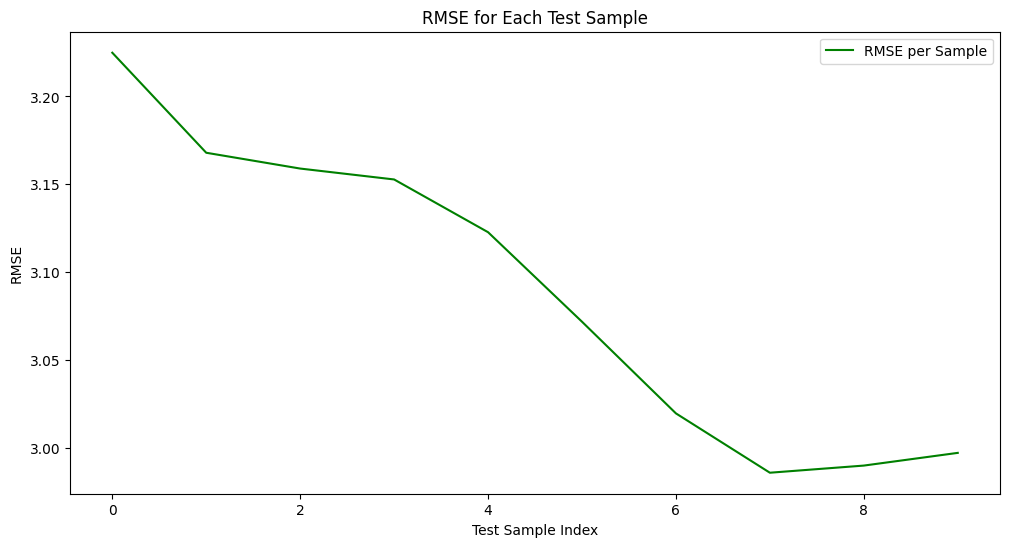

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

predicted_values_reshaped = predictions.reshape(-1, 1)
predicted_values_with_zeros = np.hstack([predicted_values_reshaped,
                                          np.zeros((predicted_values_reshaped.shape[0], data.shape[1] - 1))])
predicted_values_rescaled = scaler.inverse_transform(predicted_values_with_zeros)
predicted_prices = predicted_values_rescaled[:, 0]
predicted_prices = predicted_prices.reshape(test_targets_tensor.shape)
rmse_per_sample = np.sqrt(np.mean((predicted_prices - test_targets_tensor.cpu().numpy())**2, axis=1))

# Plot RMSE for each test sample
plt.figure(figsize=(12, 6))
plt.plot(rmse_per_sample[:10], label="RMSE per Sample", color='green')
plt.legend()
plt.title("RMSE for Each Test Sample")
plt.xlabel("Test Sample Index")
plt.ylabel("RMSE")
plt.show()

In [ ]:
predicted_values_reshaped = np.array(predicted_values).reshape(-1, 1)

predicted_values_with_zeros = np.hstack([
    predicted_values_reshaped,
    np.zeros((predicted_values_reshaped.shape[0], data.shape[1] - 1))])
predicted_values_rescaled = scaler.inverse_transform(predicted_values_with_zeros)
predicted_prices = predicted_values_rescaled[:, 0].reshape(-1, 24)

# Generate timestamps from January 1, 2025
start_date = "2025-01-01"
num_days = predicted_prices.shape[0]
date_range = pd.date_range(start=start_date, periods=num_days, freq='D')
predictions_df = pd.DataFrame(predicted_prices, index=date_range, columns=[f"Hour_{i+1}" for i in range(24)])

# Extract the predictions for 5th February 2025
feb_5_predictions = predictions_df.loc["2025-02-05"]
formatted_predictions = pd.Series(feb_5_predictions.values,
                                   index=[f"05-02-2025 {str(i).zfill(2)}:00:00" for i in range(24)])
print(f"Predicted Prices for 5th February 2025:")
print(formatted_predictions)




Predicted Prices for 5th February 2025:
05-02-2025 00:00:00    39.068040
05-02-2025 01:00:00    38.020579
05-02-2025 02:00:00    27.213537
05-02-2025 03:00:00    26.696789
05-02-2025 04:00:00    25.425403
05-02-2025 05:00:00    31.273045
05-02-2025 06:00:00    38.873280
05-02-2025 07:00:00    42.368295
05-02-2025 08:00:00    50.823484
05-02-2025 09:00:00    58.203163
05-02-2025 10:00:00    59.456151
05-02-2025 11:00:00    57.387570
05-02-2025 12:00:00    52.678294
05-02-2025 13:00:00    47.513276
05-02-2025 14:00:00    43.835657
05-02-2025 15:00:00    36.666904
05-02-2025 16:00:00    33.551576
05-02-2025 17:00:00    37.801580
05-02-2025 18:00:00    39.456121
05-02-2025 19:00:00    42.980905
05-02-2025 20:00:00    50.328723
05-02-2025 21:00:00    52.619943
05-02-2025 22:00:00    56.257237
05-02-2025 23:00:00    55.794879
dtype: float64


---
# Limitations and Suggestions for Further Work
- **Weather Data:** <br>
For our predictive model we use day-ahead electricity prices as one variable. Since the day-ahead electricity prices are forecasts of the real electricity prices, it could make sense to train the model on weather forecasts instead of the measured weather values. <br>
However, even after long research we did not find a dataset containing the daily forecast for a historical timespan. Instead, we suggest calculating the mean of the weather values of the previous 2 to 3 days as an additional factor for the prediction.<br>
For example for date x, we would include each weather variable's average of days x-1, x-2 and x-3. <br>
Due to the time constraints of this project we were not able to implement this approach and test the model's performance against our current implementation. We think that future research could use this idea in an attempt to generate even more precise predictions.<br><br>
- **Integrate Costs of Fossil Fuels:** <br>
During the first phase of gathering domain knowledge about the energy market we realized that the costs of fossil fuels have a significant impact on the final energy price in Germany. This was also confirmed by our analysis of the energy consumption and generation in Germany, that highlights a substantial share of non-renewable energy sources in the German energy mix. <br>
Therefore, we wanted to include data on prices or imports of fossil fuels in our prediction. However, even after long research we did not find reliable and freely accessible data on this. <br>
We strongly suggest including data on fossil fuels into the prediction if there are sufficient financial resources. <br><br>
- **Model:** <br>
LSTMs excel at learning complex patterns in time-series data due to their ability to maintain information across time steps using memory cells and gating mechanisms. This capability allows the model to capture both short-term fluctuations and long-term trends in energy price data. The model effectively integrates multiple features such as wind generation, residual load, and other factors, enhancing its predictive accuracy compared to models based solely on historical prices. LSTMs are adaptable to a variety of time-series forecasting tasks, making them suitable for dynamic energy markets with evolving patterns.
<br>Training LSTMs is computationally expensive compared to simpler models like ARIMA or linear regression, especially when handling large datasets. This model was trained using T4 GPU provided for free from Google colab. It takes around 2 hours to train on CPU. Due to time constraints and complexity of the model, we could not implement a second model.
<br>Integrate explainable AI (XAI) techniques such as SHAP values to provide insights into feature importance and model decision-making. Implement hyperparameter optimization techniques such as Bayesian optimization or grid search to obtain better results.

---
# Appendix: Code for Downloading and Preprocessing the Data Sources
The following section contains the code for downloading and preprocessing the energy prices data, weather data, and energy consumption and generation data. It's not needed for executing the code above, because there we use the final csv-files. However, the following code can be useful for understanding and reproducing the generation of such csv-files.

---
## Download and Preprocess the Energy Prices Data form SMARD
The data for day-ahead energy prices can be downloaded from the SMARD Website (https://www.smard.de/en/downloadcenter/download-market-data/). The following code provides the steps for preprocessing the downloaded data.


In [ ]:
df = pd.read_csv('Gro_handelspreise_202001010000_202501010000_Stunde.csv', on_bad_lines='skip', delimiter=';',
                 low_memory=False)
df = df.drop(df.columns[3:], axis=1)
df.dropna(inplace=True)

# Changed the format to match the actual date format in the column: '%b %d, %Y %I:%M %p'
# Adjusting 'Datum von' column
df['Datum von'] = pd.to_datetime(df['Datum von'], format='%d.%m.%Y %H:%M') \
    .dt.strftime('%Y-%m-%d %H:%M:%S')
# Adjusting 'Datum bis' column
df['Datum bis'] = pd.to_datetime(df['Datum bis'], format='%d.%m.%Y %H:%M') \
    .dt.strftime('%Y-%m-%d %H:%M:%S')
# Convert 'Start date' to datetime objects
df['Datum von'] = pd.to_datetime(df['Datum von'], format='%Y-%m-%d %H:%M:%S')
df['Datum bis'] = pd.to_datetime(df['Datum bis'], format='%Y-%m-%d %H:%M:%S')

df = df.drop("Datum bis", axis=1)
df.to_csv('Electricity_Forecasted_Prices.csv')

---
## Download and Preprocess the Energy Generation and Consumption Data from SMARD
The day-ahead data on energy generation and consumption can be downloaded from the SMARD Website (https://www.smard.de/en/downloadcenter/download-market-data/). The following code provides the steps for preprocessing the downloaded data.

In [ ]:
# Forecasted Energy Consumption Data

df_all = pd.read_csv("Forecasted_consumption_202001010000_202501010000_Hour.csv", delimiter=';')
df_all = df_all.drop(['End date'], axis=1)

# Convert the 'date' column to datetime format
df_all['Start date'] = pd.to_datetime(df_all['Start date'], format="%b %d, %Y %I:%M %p")

df = df_all.copy()

# Remove commas from all columns and convert to float
df.columns = df.columns.str.strip()
cols_to_convert = df.columns[df.columns != 'Start date']
df[cols_to_convert] = df[cols_to_convert].replace({',': '', '-': '0'}, regex=True)
df[cols_to_convert] = df[cols_to_convert].astype(float)

df_cleaned = df.dropna()
df_cleaned.rename(
    columns={'Total (grid load) [MWh] Calculated resolutions': 'Con: Total (grid load) [MWh] Calculated resolutions'},
    inplace=True)
df_cleaned.rename(
    columns={'Residual load [MWh] Calculated resolutions': 'Con: Residual load [MWh] Calculated resolutions'},
    inplace=True)

df_final = df_cleaned
df_final.rename(columns={'Start date': 'MESS_DATUM'}, inplace=True)
df_final.to_csv("Electricity_Forecasted_Consumption.csv")

In [ ]:
# Forecasted Energy Generation Data

df_all = pd.read_csv("Forecasted_generation_Day-Ahead_202001010000_202501010000_Hour.csv", delimiter=';')
df_all = df_all.drop(['End date'], axis=1)

# Convert the 'date' column to datetime format
df_all['Start date'] = pd.to_datetime(df_all['Start date'], format="%b %d, %Y %I:%M %p")

df = df_all.copy()
# Remove commas from all columns (except 'Start date') and convert to float
df.columns = df.columns.str.strip()
cols_to_convert = df.columns[df.columns != 'Start date']
df[cols_to_convert] = df[cols_to_convert].replace({',': '', '-': '0'}, regex=True)
df[cols_to_convert] = df[cols_to_convert].astype(float)

df_cleaned = df.dropna()

df_final = df_cleaned
df_final.rename(columns={'Start date': 'MESS_DATUM'}, inplace=True)
df_final.rename(columns={'Total [MWh] Original resolutions': 'Gen: Total [MWh] Original resolutions'}, inplace=True)
df_final.rename(columns={
    'Photovoltaics and wind [MWh] Calculated resolutions': 'Gen: Photovoltaics and wind [MWh] Calculated resolutions'},
                inplace=True)
df_final.rename(
    columns={'Wind offshore [MWh] Calculated resolutions': 'Gen: Wind offshore [MWh] Calculated resolutions'},
    inplace=True)
df_final.rename(columns={'Wind onshore [MWh] Calculated resolutions': 'Gen: Wind onshore [MWh] Calculated resolutions'},
                inplace=True)
df_final.rename(
    columns={'Photovoltaics [MWh] Calculated resolutions': 'Gen: Photovoltaics [MWh] Calculated resolutions'},
    inplace=True)
df_final.rename(columns={'Other [MWh] Original resolutions': 'Gen: Other [MWh] Original resolutions'}, inplace=True)
df_final.to_csv("Electricity_Forecasted_Generation.csv")

---
## Download and Preprocess the Raw Weather Data from DWD
The following code is based on the work of Matthias Kleine (https://www.kaggle.com/datasets/matthiaskleine/german-temperature-data-1990-2021) and was adapted to the requirements of our project. The data was downloaded from the Deutsche Wetterdienst (https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/). <br><br>
The code includes the process of downloading and preprocessing the raw weather data using as an example the variable "Wind Speed". For other weather variables the code is similar, but might slightly differ due to different namings and directory structure. However, the overall procedure remains the same. <br>
When using the code for another weather variable, it must be adapted to the required weather variable and timeframe. Depending on the structure and naming of the respective data files, the code might need further adaptions. The following code was written for preprocessing the data for Wind Speed from 01.01.2020 to 31.12.2024.<br><br>
Since the DWD splits the data into historical and recent data, we need to preprocess both. The methods are similar, but not exactly the same. The following code shows the whole process including historical and recent data.<br>
In order to decide on a subset of all weather stations to use for our prediction model, we also need to preprocess the meta data of the weather stations. Again, the process here is similar to that of the historical and recent data, but not exactly the same. <br><br>
Functions that are not required to understand the code structure and/or are used multiple times in the exact same way are defined in the beginning of the section.

In [ ]:
import pandas as pd
import numpy as np
import bs4
import requests
import shutil
import os
import zipfile
import glob
import json
from geopy.distance import geodesic
import folium
import geopandas as gpd

In [ ]:
# name of weather variable according to DWD (e.g., 'Wind_F' for wind speed)
variable_name = 'Wind_F'

#### Define functions

In [ ]:
# function to prepare the merge of txt-files
def prepare_merge_files(index_col, header_col):
    # columns of interest in the original data files
    target_index_col = 'MESS_DATUM'
    target_header_col = 'STATIONS_ID'
    target_numeric_col = '   F'
    usecols = [target_index_col, target_header_col, target_numeric_col]

    dtypes_dict = {'MESS_DATUM' : 'str',
                   'STATIONS_ID' : 'int16',
                   'QN_3' : 'int8',
                   '   F': 'float'}

    #number_of_files = 506
    stepsize = 20

    # create the bundles with the configured stepsize
    start_list = list(range(0, (number_of_files - stepsize), stepsize))
    stop_list = list(range(stepsize, number_of_files, stepsize))
    start_stop_list = list(zip(start_list, stop_list))

    # add the "rest"
    start_stop_list.append((stop_list[-1], number_of_files))

    return target_index_col, target_header_col, target_numeric_col, usecols, dtypes_dict, start_stop_list

In [ ]:
# function to combine several csv-files into one file
def combine_files(tmp_files, tmp_all):
    with open(tmp_all, 'wb') as outfile:
        for i, filename in enumerate(tmp_files):
            if filename == tmp_all:
                continue
            with open(filename, 'rb') as readfile:
                if i != 0:
                    readfile.readline()
                shutil.copyfileobj(readfile, outfile)

In [ ]:
# function to delete all duplicates in the dataframe (same MESS_DATUM and STATIONS_ID)
def delete_duplicates(df):
    count_deleted_duplicates = 0
    for station in df.index.unique():
        # select and count before cleaning
        tmp = df.loc[station, :].copy()
        before = len(tmp)

        # execute removal of duplicates
        tmp.reset_index(inplace=True)
        tmp.drop_duplicates(subset=['MESS_DATUM', 'STATIONS_ID'], keep='first', inplace=True)

        # do the statistics
        after = len(tmp)
        deleted = before - after
        count_deleted_duplicates += deleted

        # write result
        print("Cleaning STATIONS_ID " + str(station) + ": " + str(deleted) + " deleted duplicates.")
        tmp.to_csv(tmp_path + "station_" + str(station) + ".csv", index=False)

    print("Deleted duplicates: " + str(count_deleted_duplicates))

In [ ]:
# function to format the df
def format_df(df, station_filenames, unstacking_dtypes_dict):
    # unstacking: creating one file that contains all data organized in columns (weather stations) and rows (measuring dates)
    count_rows = 0
    dfs = []
    for station_file in station_filenames:
        print(station_file)
        df = pd.read_csv(station_file,
                         index_col=['MESS_DATUM', 'STATIONS_ID'],
                         dtype=unstacking_dtypes_dict,
                         sep=",")

        # We count the rows of the imported data to compare the number
        # to some output from above, just to double check that we lost no data
        count_rows += len(df)
        df = df.unstack()
        dfs.append(df)

    df = pd.concat(dfs, axis=1)
    del(dfs)

    # compare amount of columns in df and amount of weather stations in all_data to make sure that no weather station was lost during unstacking
    df_tmp_all = pd.read_csv(f'{tmp_path}/tmp_all.csv')

    distinct_stations_count = df_tmp_all['STATIONS_ID'].nunique()
    distinct_columns_count = df.columns.nunique()

    print(f"Number of stations in tmp_all.csv: {distinct_stations_count}")
    print(f"Number of columns in dataframe: {distinct_columns_count}")

    # Dropping metalevel of index resulting from unstacking.
    df = df.droplevel(0, axis=1)

    # We left this step for now to be able to compare the number of
    # transformed entries with the original numbers.
    df.replace(-999.0, np.nan, inplace=True)

    # convert columns in int type and sort them ascending from left to right
    columns = []
    for col in df.columns:
        columns.append(int(col))

    df.columns = columns
    df = df[sorted(df.columns)]

    # convert index to datetime index and sort it
    df.index = pd.to_datetime(df.index, format='%Y%m%d%H')
    df.sort_index(inplace=True)

    print("Index Min:", df.index.min())
    print("Index Max:", df.index.max())
    print("Expected Range Length:", len(pd.date_range(df.index.min(), df.index.max(), freq="1h")))

    return df


In [ ]:
# function to generate a json-file containing the geographic information of the centroids of all german states
def create_centroid_file_german_states():
    # The following code is based on this data source containing polygons for each German State: https: // gist.github.com / fegoa89 / d33514a5e59eb5af812b909915bcb3da?short_path=50bd222

    # Load the GeoJSON file and change the (multi-) polygons of each state to a centroid value

    file_path = "germany-states.geojson"
    gdf = gpd.read_file(file_path)

    # Re-project to a projected CRS for accurate centroid calculation
    gdf_projected = gdf.to_crs(epsg=3857)  # EPSG:3857 is Web Mercator

    # Calculate centroids in the projected CRS
    gdf_projected["centroid"] = gdf_projected["geometry"].centroid

    # Transform centroids back to geographic CRS (EPSG:4326)
    gdf_projected["centroid"] = gdf_projected["centroid"].to_crs(epsg=4326)

    # Add centroids in geographic CRS back to the original GeoDataFrame
    gdf["centroid"] = gdf_projected["centroid"]

    # save result to file "germany-states-centroids_only.geojson"
    gdf_centroids = gdf.copy()
    gdf_centroids = gdf_centroids.set_geometry("centroid")
    output_file_centroids = "germany-states-centroids-only.geojson"
    gdf_centroids.drop(columns=["geometry"]).to_file(output_file_centroids, driver="GeoJSON")
    print(f"File with centroids as geometry saved to {output_file_centroids}")

    # Format the gesojson file to only contain the name of the state and the respective centre coordinates
    file_path = "germany-states-centroids-only.geojson"
    gdf = gpd.read_file(file_path)

    # Reproject the GeoDataFrame to a projected CRS (e.g., EPSG:3035 for Europe)
    gdf_projected = gdf.to_crs(epsg=3035)

    # Compute the centroids in the projected CRS
    gdf_projected["centroid"] = gdf_projected.geometry.centroid

    # Transform the centroids back to geographic CRS (EPSG:4326) for lat/lon
    gdf_projected["centroid"] = gdf_projected["centroid"].to_crs(epsg=4326)

    # Extract state names and centroid coordinates
    formatted_data = []
    for _, row in gdf_projected.iterrows():
        state = row["NAME_1"]  # State name
        coordinates = row["centroid"].coords[0]  # Extract (lon, lat) from Point geometry
        formatted_entry = {
            "state": state,
            "coordinates": (round(coordinates[1], 4), round(coordinates[0], 4)),  # Format as (lat, lon)
        }
        formatted_data.append(formatted_entry)

    # Save the formatted data to json file "germany-states-centroids-formatted"
    output_file = "germany-states-centroids-formatted.json"
    with open(output_file, "w") as f:
        json.dump(formatted_data, f, indent=4)

    print(f"Formatted data saved to {output_file}")

In [ ]:
# function to find the nearest weather station to each centroid
def find_nearest_locations(state_centers, locations):
    # find the instances in locations that are closest to instances in state_centers (one instance of locations for one instance of state_centers)
    # one weather station can only appear once in the list
    results = []
    selected_locations = set()  # To keep track of already-selected nearest locations

    for _, state in state_centers.iterrows():
        state_coords = (state['latitude'], state['longitude'])

        # Calculate distances between the state center and all locations
        locations['distance'] = locations.apply(
            lambda loc: geodesic(state_coords, (loc['latitude'], loc['longitude'])).km,
            axis=1
        )

        # Sort locations by distance
        sorted_locations = locations.sort_values(by='distance').reset_index()

        # Find the nearest location not already in results
        nearest = None
        for _, loc in sorted_locations.iterrows():
            if loc['Stations_id'] not in selected_locations:
                nearest = loc
                break

        # Add the nearest location to the results
        if nearest is not None:
            selected_locations.add(nearest['Stations_id'])
            results.append({
                'state': state['state'],
                'nearest_location_id': nearest['Stations_id'],
                'distance_km': nearest['distance']
            })

    return pd.DataFrame(results)

### Historical Data
The data is filtered to match the timeframe that was set for our use case. Thereby, data is included that was measured between 01.01.2020 and 31.12.2023.

In [ ]:
# the directories must be created beforehand
download_path   = "historical/download/"
extraction_path = "historical/extracted/"
tmp_path        = "historical/tmp/"
result_path     = "historical/results/"

#### Download the data files from DWD
Thereby, filter for the MESS_DATUM via the file names

In [ ]:
# download all zip-files that contain data from at least 01.01.2020 to 31.12.2023
# download the data: change to URL to the specific directory you want to download the data from
url = "https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/wind/historical/"

# Thresholds for filtering
start_date_threshold = 20200101
end_date_threshold = 20231231

# Fetch the HTML content from the URL
r = requests.get(url)
data = bs4.BeautifulSoup(r.text, "html.parser")

# Iterate through all links in the HTML
for l in data.find_all("a"):
    filename = l['href']

    # Skip directories or irrelevant links
    if filename != "../" and filename.endswith(".zip"):
        # Extract components from the filename
        components = filename.split("_")
        if len(components) >= 5:
            try:
                start_date = int(components[3])
                end_date = int(components[4].split(".")[0])  # Remove file extension before parsing

                # Check if the file meets the criteria
                if start_date <= start_date_threshold and end_date >= end_date_threshold:
                    print(f"Downloading: {filename}")
                    # Download the file
                    file_response = requests.get(url + filename)
                    with open(download_path + filename, 'wb') as f:
                        f.write(file_response.content)
            except ValueError:
                print(f"Skipping {filename}: Invalid date format")


#### Extract the txt-files from the downloaded zip-files (they hold the actual data)
Results in one txt file per zip-file

In [ ]:
os.makedirs(extraction_path, exist_ok=True)
number_of_files = 0

# Iterate over all zip files in the directory
for zip_file in glob.glob(os.path.join(download_path, "*.zip")):
    with zipfile.ZipFile(zip_file, 'r') as z:
        # List all files in the zip archive
        for file_name in z.namelist():
            # Check if the file is a .txt file and starts with "produkt_ff_stunde"
            if file_name.endswith(".txt") and file_name.startswith("produkt_ff_stunde"):
                print(f"Extracting {file_name} from {zip_file}")
                number_of_files += 1
                # Extract the specific file to the extraction path
                z.extract(file_name, extraction_path)

# List all extracted txt files
extracted_files = glob.glob(os.path.join(extraction_path, "produkt_ff_stunde*.txt"))
print(f"{number_of_files} extracted files: {extracted_files}")

#### Merge all txt-files into one csv-file
Thereby:
1. set MESS_DATUM and STATIONS_ID as index
2. only keep the relevant columns
3. discard all rows that have a MESS_DATUM that is lower than 20200101

Steps:
1. Convert a batch of 20 txt-files into one intermediate csv-file
2. Merge all single csv-files to one big csv-file

In [ ]:
# batch processing of txt-files -> allows processing files in manageable chunks to prevent memory overload
# convert 20 txt files to one csv file and only keep the relevant columns
# use MESS_DATUM and STATIONS_ID as index columns
# filter all values out that are not in the specified time frame (were measured before 01.01.2020)
target_index_col, target_header_col, target_numeric_col, usecols, dtypes_dict, start_stop_list = prepare_merge_files('MESS_DATUM', 'STATIONS_ID')

count = 0
filenames = glob.glob(extraction_path + "*.txt")

for start, stop in start_stop_list:
    count += 1

    if count % 10 == 0:
        print("Reading original files " + str(start) + " to " + str(stop))

    dfs = []
    for i in range(start, stop):
        # several options to optimize memory behaviour:
        # - import only the cols needed
        # - put MESS_DATUM and STATIONS_ID in the index
        #   (if you have enough memory, leaving this out will be faster)
        # - use minimal datatypes
        df = pd.read_csv(filenames[i],
                         usecols=usecols,
                         index_col=[target_index_col, target_header_col],
                         dtype=dtypes_dict,
                         sep=";",
                         encoding="latin1")

        print(f"Processing file: {filenames[i]}")
        if df.shape[0] > 0:
            dfs.append(df)

    # Concatenate all DataFrames for this batch
    df = pd.concat(dfs, ignore_index=False)

    # Filter the DataFrame to keep only rows where MESS_DATUM >= '20200101'
    # Since MESS_DATUM is an index, we need to reset it first to be able to filter
    if "MESS_DATUM" in df.index.names:
        df = df.reset_index()  # Reset index to make MESS_DATUM a regular column

    # Now we can filter by the MESS_DATUM column
    df = df[df["MESS_DATUM"] >= "2020010100"]

    # Set MESS_DATUM and STATIONS_ID back as index
    df = df.set_index(["MESS_DATUM", "STATIONS_ID"])

    # Save the filtered DataFrame to a CSV file
    output_filename = tmp_path + f"tmp_{start+1}_{stop}.csv"
    df.to_csv(output_filename, index=True)

    print(f"Saved filtered file: {output_filename}")

print("Writing of intermediate files finished.")

# merge all output files into one.
del(df)
tmp_all = tmp_path + 'tmp_all.csv'
tmp_files = glob.glob(tmp_path + '*.{}'.format('csv'))
combine_files(tmp_files, tmp_all)

#### Format the tmp_all.csv file
1. Remove duplicates
2. Unstack and format the dataframe to get the wanted format
3. Make sure that no timestamps or weather stations are lost during the whole process

In [ ]:
# we repeat this in case we resume execution
# create a dataframe out of the tmp_all.csv file
tmp_all = tmp_path + 'tmp_all.csv'

df = pd.read_csv(tmp_all,
    index_col='STATIONS_ID',
    dtype=dtypes_dict,
    sep=",")

# delete duplicates per weather station (means two rows with same MESS_DATUM and STATION_ID)
# save data per weather station in tmp
delete_duplicates(df)

unstacking_dtypes_dict = {'MESS_DATUM': 'int64', 'STATIONS_ID': 'short', target_numeric_col: 'float'}
station_filenames = glob.glob(tmp_path + "station_*.csv")

# format the dataframe
df_formatted = format_df(df, station_filenames, unstacking_dtypes_dict)

# write result in csv file
result_file = result_path + "/Wind_F_historical.csv"
df_formatted.to_csv(result_file, index=True)

# clean up dataframes
del(df_formatted)

### Recent Data
The data is filtered to match the timeframe that was set for this specific use case. Thereby, data is included that was measured between 01.01.2024 and 31.12.2024.

In [ ]:
# the directories must be created beforehand
download_path   = "recent/download/"
extraction_path = "recent/extracted/"
tmp_path        = "recent/tmp/"
result_path     = "recent/results/"

#### Download the data files from DWD

In [ ]:
# download all zip-files

# download the data: change to URL to the specific directory you want to download the data from
url = "https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/wind/recent/"

# execute the downloads

# Fetch the HTML content from the URL
r = requests.get(url)
data = bs4.BeautifulSoup(r.text, "html.parser")

# Iterate through all links in the HTML
for l in data.find_all("a"):
    filename = l['href']

    # Skip directories or irrelevant links
    if filename != "../" and filename.endswith(".zip"):

        print(f"Downloading: {filename}")
        # Download the file
        file_response = requests.get(url + filename)
        with open(download_path + filename, 'wb') as f:
            f.write(file_response.content)

#### Extract the txt-files from the downloaded zip-files (they hold the actual data)
Results in one txt file per zip-file

In [ ]:
# Ensure the extraction path exists
os.makedirs(extraction_path, exist_ok=True)

number_of_files = 0

# Thresholds for filtering
start_date_threshold = 20240101
end_date_threshold = 20241231

# Iterate over all zip files in the directory
for zip_file in glob.glob(os.path.join(download_path, "*.zip")):
    with zipfile.ZipFile(zip_file, 'r') as z:
        # List all files in the zip archive
        for file_name in z.namelist():
            # Check if the file is a .txt file and starts with "produkt_ff_stunde"
            if file_name.endswith(".txt") and file_name.startswith("produkt_ff_stunde"):
                components = file_name.split("_")
                if len(components) >= 5:
                    try:
                        start_date = int(components[3])
                        end_date = int(components[4])

                        # Check if the file meets the criteria
                        if start_date <= start_date_threshold and end_date >= end_date_threshold:
                            print(f"Extracting {file_name} from {zip_file}")
                            number_of_files += 1
                            # Extract the specific file to the extraction path
                            z.extract(file_name, extraction_path)
                    except ValueError:
                        print(f"Skipping {file_name}: Invalid date format")

# List all extracted txt files
extracted_files = glob.glob(os.path.join(extraction_path, "produkt_ff_stunde*.txt"))
print(f"{number_of_files} extracted files: {extracted_files}")

#### Merge all txt-files into one csv-file
Thereby:
1. set MESS_DATUM and STATIONS_ID as index
2. only keep the relevant columns
3. discard all rows that have a MESS_DATUM that is not in the timeframe (01.01.2024 to 31.12.2024)

Steps:
1. Convert a batch of 20 txt-files into one intermediate csv-file
2. Merge all single csv-files to one big csv-file

In [ ]:
# batch processing of txt-files -> allows processing files in manageable chunks to prevent memory overload
# convert 20 txt files to one csv file and only keep the relevant columns
# use MESS_DATUM and STATIONS_ID as index columns
# filter all values out that are not in the specified time frame (were measured between 01.01.2024 and 31.12.2024)
target_index_col, target_header_col, target_numeric_col, usecols, dtypes_dict, start_stop_list = prepare_merge_files('MESS_DATUM', 'STATIONS_ID')


count = 0
filenames = glob.glob(extraction_path + "*.txt")

for start, stop in start_stop_list:
    count += 1

    if count % 10 == 0:
        print("Reading original files " + str(start) + " to " + str(stop))

    dfs = []
    for i in range(start, stop):
        # several options to optimize memory behaviour:
        # - import only the cols needed
        # - put MESS_DATUM and STATIONS_ID in the index
        #   (if you have enough memory, leaving this out will be faster)
        # - use minimal datatypes
        df = pd.read_csv(filenames[i],
                         usecols=usecols,
                         index_col=[target_index_col, target_header_col],
                         dtype=dtypes_dict,
                         sep=";",
                         encoding="latin1")

        print(f"Processing file: {filenames[i]}")
        if df.shape[0] > 0:
            dfs.append(df)

    # Concatenate all DataFrames for this batch
    df = pd.concat(dfs, ignore_index=False)

    # Since MESS_DATUM is an index, we need to reset it first to be able to filter
    if "MESS_DATUM" in df.index.names:
        df = df.reset_index()  # Reset index to make MESS_DATUM a regular column

    # Now we can filter by the MESS_DATUM column
    df = df[df["MESS_DATUM"] >= "2024010100"]
    df = df[df["MESS_DATUM"] <= "2024123123"]

    # Set MESS_DATUM and STATIONS_ID back as index
    df = df.set_index(["MESS_DATUM", "STATIONS_ID"])

    # Save the filtered DataFrame to a CSV file
    output_filename = tmp_path + f"tmp_{start+1}_{stop}.csv"
    df.to_csv(output_filename, index=True)

    print(f"Saved filtered file: {output_filename}")

print("Writing of intermediate files finished.")

# merge all output files into one.
del(df)
tmp_all = tmp_path + 'tmp_all.csv'
tmp_files = glob.glob(tmp_path + '*.{}'.format('csv'))
combine_files(tmp_files, tmp_all)

#### Format the tmp_all.csv file
1. Remove duplicates
2. Unstack and format the dataframe to get the wanted format
3. Make sure that no timestamps or weather stations are lost during the whole process

In [ ]:
# we repeat this in case we resume execution
# create a dataframe out of the tmp_all.csv file
tmp_all = tmp_path + 'tmp_all.csv'

df = pd.read_csv(tmp_all,
    index_col='STATIONS_ID',
    dtype=dtypes_dict,
    sep=",")

# delete duplicates per weather station (means two rows with same MESS_DATUM and STATION_ID)
# save data per weather station in tmp
delete_duplicates(df)

unstacking_dtypes_dict = {'MESS_DATUM': 'int64', 'STATIONS_ID': 'short', target_numeric_col: 'float'}
station_filenames = glob.glob(tmp_path + "station_*.csv")

# format the dataframe
df_formatted = format_df(df, station_filenames, unstacking_dtypes_dict)

# write result in csv file
result_file = result_path + "/Wind_F_recent.csv"
df_formatted.to_csv(result_file, index=True)

# clean up dataframes
del(df_formatted)

### Meta Data of Weather Stations
The code does two things:
 1. Filters the weather stations according to their time frame: We want to keep weather stations that continuously delivered data from 01.01.2020 to 31.12.2024.
2. Extracts the geographical information of the weather stations: We want to decide on the final weather stations based on their geographical location.

In [ ]:
# the directories must be created beforehand
extraction_path = "meta/extracted/"
tmp_path        = "meta/tmp/"
result_path     = "meta/results/"

In [ ]:
# extract the geographical data from the extracted download (as we don't want weather stations that don't provide extracted data anyway)

# Ensure the extraction path exists
os.makedirs(extraction_path, exist_ok=True)

number_of_files = 0

# Iterate over all zip files in the directory
for zip_file in glob.glob(os.path.join("recent/download", "*.zip")):
    with zipfile.ZipFile(zip_file, 'r') as z:
        # List all files in the zip archive
        for file_name in z.namelist():
            # Check if the file is a .txt file and starts with "Metadaten_Geographie"
            if file_name.endswith(".txt") and file_name.startswith("Metadaten_Geographie"):
                print(f"Extracting {file_name} from {zip_file}")
                number_of_files += 1
                # Extract the specific file to the extraction path
                z.extract(file_name, extraction_path)

# List all extracted txt files
extracted_files = glob.glob(os.path.join(extraction_path, "Metadaten_Geographie*.txt"))
print(f"{number_of_files} extracted files: {extracted_files}")


In [ ]:
# columns of interest in the original data files
target_index_col = 'Stations_id'
target_numeric_col1 = 'Geogr.Breite'
target_numeric_col2 = 'Geogr.Laenge'
target_numeric_col3 = 'von_datum'
target_numeric_col4 = 'bis_datum'
usecols = [target_index_col, target_numeric_col1, target_numeric_col2, target_numeric_col3, target_numeric_col4]

dtypes_dict = {'Stations_id' : 'int16',
               'Geogr.Breite': 'str',
               'Geogr.Laenge': 'str',
               'von_datum': 'str',
               'bis_datum': 'str'}

In [ ]:
#number_of_files = 506
stepsize = 20

# create the bundles with the configured stepsize
start_list = list(range(0, (number_of_files - stepsize), stepsize))
stop_list = list(range(stepsize, number_of_files, stepsize))
start_stop_list = list(zip(start_list, stop_list))

# add the "rest"
start_stop_list.append((stop_list[-1], number_of_files))
print(start_stop_list)

In [ ]:
# batch processing of txt-files -> allows processing files in manageable chunks to prevent memory overload
# convert 20 txt files to one csv file and only keep the relevant columns
# use Stations_id as index columns
# filter all stations out that did not deliver values continuously between at least 01.01.2020 and 31.12.2024
count = 0
filenames = glob.glob(extraction_path + "*.txt")

for start, stop in start_stop_list:
    count += 1

    if count % 10 == 0:
        print("Reading original files " + str(start) + " to " + str(stop))

    dfs = []
    for i in range(start, stop):
        df = pd.read_csv(filenames[i],
                         usecols=usecols,
                         index_col=[target_index_col],
                         dtype=dtypes_dict,
                         sep=";",
                         encoding="latin1")

        print(f"Processing file: {filenames[i]}")
        if df.shape[0] > 0:
            dfs.append(df)

    # Concatenate all DataFrames for this batch
    df = pd.concat(dfs, ignore_index=False)

    print(df.head())
    # filter the data such that the 'von_datum' must be earlier than 01.01.2020 and the bis_datum must be empty or 31.12.2024 -> ensures that the specific weather station delivered values continuously between 2020 and 2024
    df = df[df["von_datum"] <= "20200101"]
    df = df[df["bis_datum"].str.strip().isna() | (df["bis_datum"].str.strip() == "") | (df["bis_datum"].str.strip() == "20241231")]

    # Save the filtered DataFrame to a CSV file
    output_filename = tmp_path + f"tmp_{start+1}_{stop}.csv"
    df.to_csv(output_filename, index=True)

    print(f"Saved filtered file: {output_filename}")

print("Writing of intermediate files finished.")

In [ ]:
# merge all output files into one
del(df)
tmp_geometry_all = result_path + 'stations_meta.csv'
tmp_files = glob.glob(tmp_path + '*.{}'.format('csv'))
combine_files(tmp_files, tmp_geometry_all)

### Create the Final Dataset
Based on the historical measurement values, recent measurement values and metadata about the stations the following code creates the final dataset.

#### Select 16 weather stations to be used for the final dataset
The final weather stations must fulfill all of the following requirements:
- must have continuously delivered values from 01.01.2020 to 31.12.2024 (according to the DWD meta and time data)
- must not have changed location during that timespan
- must be the closest station to the center of one of the German states

In [ ]:
# load files into dataframes
df_recent = pd.read_csv("recent/results/Wind_F_recent.csv")
df_historical = pd.read_csv("historical/results/Wind_F_historical.csv")
df_meta = pd.read_csv("meta/results/stations_meta.csv")

# get station IDs from all files
recent_stations = df_recent.columns.tolist()
recent_stations.remove('MESS_DATUM')
historical_stations = df_historical.columns.tolist()
historical_stations.remove('MESS_DATUM')
meta_stations = df_meta['Stations_id'].astype(str).tolist()

# find stations that are present in all three datasets
common_stations = set(recent_stations).intersection(historical_stations).intersection(meta_stations)
common_stations_list_tmp = list(common_stations)
common_stations_list = [int(x) for x in common_stations_list_tmp]

print(f"Amount of stations in extracted dataset: {len(recent_stations)}")
print(f"Amount of stations in download dataset: {len(historical_stations)}")
print(f"Amount of stations in meta dataset: {len(meta_stations)}")
print(f"Amount of stations in common list: {len(common_stations_list)}")

In [ ]:
# create a json file containing the centroids of all German states
create_centroid_file_german_states()

# visualize the centroid of each state on a map
input_file = "germany-states-centroids-formatted.json"

# Read the data from the file
with open(input_file, "r") as f:
    german_states = json.load(f)

# Create a folium map centered on Germany
germany_map = folium.Map(location=[51.1657, 10.4515], zoom_start=6)

# Add markers for each state
for state in german_states:
    folium.Marker(
        location=state["coordinates"],
        popup=f"{state['state']}\n({state['coordinates'][0]}, {state['coordinates'][1]})",
        tooltip=state["state"]
    ).add_to(germany_map)

# Display the map
germany_map


File with centroids as geometry saved to germany-states-centroids-only.geojson
Formatted data saved to germany-states-centroids-formatted.json


In [ ]:
# choose the stations that are nearest to the centres of one of the German states -> resulting in 16 stations

# Load the json file containing the centroids of German sates and convert into dataframe
with open('germany-states-centroids-formatted.json', 'r', encoding='utf-8') as f:
    state_centers_data = json.load(f)

state_centers = pd.DataFrame([{
    'state': state['state'],
    'latitude': state['coordinates'][0],
    'longitude': state['coordinates'][1]
} for state in state_centers_data])

# Load the CSV file containing the coordinates for each station
locations = pd.read_csv('meta/results/stations_meta.csv', delimiter=',')
locations.columns = locations.columns.str.strip()
locations.rename(columns={'Geogr.Breite': 'latitude', 'Geogr.Laenge': 'longitude'}, inplace=True)

# Filter locations to include only rows with stations_id that is in common_stations_list (quality assurance of stations)
locations = locations[locations['Stations_id'].isin(common_stations_list)]

In [ ]:
nearest_locations = find_nearest_locations(state_centers, locations)
nearest_locations_list = nearest_locations['nearest_location_id'].tolist()

nearest_locations.to_csv('nearest_locations.csv', index=False)


In [ ]:
# visualize the chosen weather stations

data_file = 'meta/results/stations_meta.csv'
locations = pd.read_csv(data_file, delimiter=',')
locations.columns = locations.columns.str.strip()  # Remove extra spaces
locations.rename(columns={'Geogr.Breite': 'latitude', 'Geogr.Laenge': 'longitude'}, inplace=True)

filtered_locations = locations[locations['Stations_id'].isin(nearest_locations_list)]

# Create a map centered on Germany
germany_center = [51.1657, 10.4515]  # Latitude, Longitude for Germany's approximate center
m = folium.Map(location=germany_center, zoom_start=6)

# Add filtered locations to the map
for _, row in filtered_locations.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Station ID: {row['Stations_id']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Display map
m


In [ ]:
# Load datasets
df_recent = pd.read_csv("recent/results/Wind_F_recent.csv")
df_historical = pd.read_csv("historical/results/Wind_F_historical.csv")

# Concatenate datasets
df_all_measurement_data = pd.concat([df_recent, df_historical])

# Filter dataset for selected weather stations
nearest_locations_list_string = list(map(str, nearest_locations_list))
df_filtered = df_all_measurement_data[['MESS_DATUM'] + nearest_locations_list_string]

df_filtered

,MESS_DATUM,4928,1587,427,7389,691,1975,7410,15189,5715,5480,5871,5029,3126,6314,2303,1270
0,2024-01-01 00:00:00,5.8,3.5,3.9,2.2,5.9,5.2,6.4,1.9,6.6,7.9,6.6,7.7,2.5,5.5,3.9,9.3
1,2024-01-01 01:00:00,5.4,3.4,3.8,2.5,7.2,4.9,6.9,2.3,5.2,8.4,8.5,8.3,3.8,5.4,2.8,6.3
2,2024-01-01 02:00:00,5.1,3.4,3.7,2.4,7.1,4.6,5.0,3.0,5.8,7.9,7.9,8.6,3.8,5.1,2.6,6.3
3,2024-01-01 03:00:00,4.1,3.5,4.0,2.1,6.4,5.4,5.7,3.8,5.4,7.8,7.2,8.7,4.6,4.9,2.6,6.4
4,2024-01-01 04:00:00,3.7,3.8,4.2,2.0,6.0,5.6,7.2,3.2,5.7,8.9,8.1,8.7,3.6,5.1,2.5,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2023-12-31 19:00:00,6.3,2.0,5.2,4.2,4.7,5.2,7.7,5.6,3.8,6.5,8.7,8.3,3.7,5.2,2.5,7.3
35060,2023-12-31 20:00:00,5.5,3.4,4.9,4.6,5.5,6.4,8.3,5.9,3.3,7.5,8.2,7.7,2.6,6.4,3.1,7.5
35061,2023-12-31 21:00:00,4.6,3.7,5.0,3.4,6.4,5.3,8.5,4.1,5.9,8.6,9.1,7.5,3.7,5.9,3.0,7.3
35062,2023-12-31 22:00:00,4.3,3.0,5.2,3.3,6.5,5.4,7.5,3.2,6.6,8.7,7.6,8.0,4.7,5.3,3.3,8.3


In [ ]:
# Calculate the mean of the remaining columns
df_filtered.loc[:, 'mean'] = df_filtered.drop(columns=['MESS_DATUM']).mean(axis=1)

In [ ]:
# Only keep the important values of the dataframe, round the mean values to 2 decimals and rename the value column

value_name = "Wind_F"

df_final_tmp = df_filtered[['MESS_DATUM', 'mean']]
df_final = df_final_tmp.copy()
df_final['mean'] = df_final['mean'].round(2)
df_final.rename(columns={'mean': value_name}, inplace=True)

df_final

,MESS_DATUM,Wind_F
0,2024-01-01 00:00:00,5.30
1,2024-01-01 01:00:00,5.32
2,2024-01-01 02:00:00,5.14
3,2024-01-01 03:00:00,5.16
4,2024-01-01 04:00:00,5.30
...,...,...
35059,2023-12-31 19:00:00,5.43
35060,2023-12-31 20:00:00,5.68
35061,2023-12-31 21:00:00,5.75
35062,2023-12-31 22:00:00,5.68


In [ ]:
# save the final dataset to csv
output_filename = f"final_dataset_Wind_F_test.csv"
df_final.to_csv(output_filename, index=True)